In [1]:
## we used google colab platform for this project.

import tensorflow as tf
device_name = tf.test.gpu_device_name()
## Initialize the G.P.U (Graphics Processing Unit)
with tf.device(device_name):
  print(device_name.split(":")[1]," running . . . ")

GPU  running . . . 


In [2]:
## Import Libraries

import os,sys
import numpy as np
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(2)

## Import Libraries

import os, keras, numpy, tensorflow
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

In [3]:
def discriminator_model(image_shape=(28,28,1), number_of_class=10):

  # 1st layer

  # input lebel
  # input shape: (1,)
  # output shape: (28, 28, 1)
  input_label = tensorflow.keras.Input(shape=(1,))
  embedding_layer = tensorflow.keras.layers.Embedding(input_dim = number_of_class, output_dim = 50)(input_label)
  dense_layer = tensorflow.keras.layers.Dense(units = image_shape[0] * image_shape[1])(embedding_layer)
  reshape_layer = tensorflow.keras.layers.Reshape(target_shape = (image_shape[0], image_shape[1], 1))(dense_layer)

  # input image
  # input shape: (28, 28, 1)
  # output shape: (28, 28, 1)
  input_image = tensorflow.keras.Input(shape=image_shape)

  # concatenate 1
  # input shape: (28, 28, 1) + (28, 28, 1)
  # output shape: (28, 28, 2)
  merge_layer = tensorflow.keras.layers.Concatenate()([input_image, reshape_layer])




  # 2nd layer

  # input shape: (28, 28, 2)
  # output shape: (14, 14, 128)
  convolution_layer = tensorflow.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), strides=(2,2), padding='same', activation = 'relu')(merge_layer)

  # input lebel
  # input shape: (1,)
  # output shape: (14, 14, 1)
  embedding_layer = tensorflow.keras.layers.Embedding(input_dim = number_of_class, output_dim = 50)(input_label)
  dense_layer = tensorflow.keras.layers.Dense(units = 14*14, activation='relu')(embedding_layer)
  reshape_layer = tensorflow.keras.layers.Reshape(target_shape = (14, 14, 1))(dense_layer)

  # concatinate 2
  # input shape: (14, 14, 128)+(14, 14, 1)
  # output shape: (14, 14, 129)
  merge_layer = tensorflow.keras.layers.Concatenate()([convolution_layer, reshape_layer])




  # 3rd layer

  # input shape: (14, 14, 129)
  # output layer: (7, 7, 128)
  convolution_layer = tensorflow.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), strides=(2,2), padding='same', activation = 'relu')(merge_layer)
  flatten_layer = tensorflow.keras.layers.Flatten()(convolution_layer)
  dropout_layer = tensorflow.keras.layers.Dropout(rate = 0.2)(flatten_layer)
  


  # 4th and final layer
  output_layer = tensorflow.keras.layers.Dense(units = 1, activation='sigmoid')(dropout_layer)

  # connect full model
  model = tensorflow.keras.models.Model([input_image, input_label], output_layer)

  # Adam optimizer
  optimizer = tensorflow.keras.optimizers.Adam(learning_rate= 3e-4, beta_1=0.5)

  # compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

# call discriminator model
discriminator_model_temp= discriminator_model()
print(discriminator_model_temp.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 50)        500         ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 1, 784)       39984       ['embedding[0][0]']              
                                                                                                  
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                              

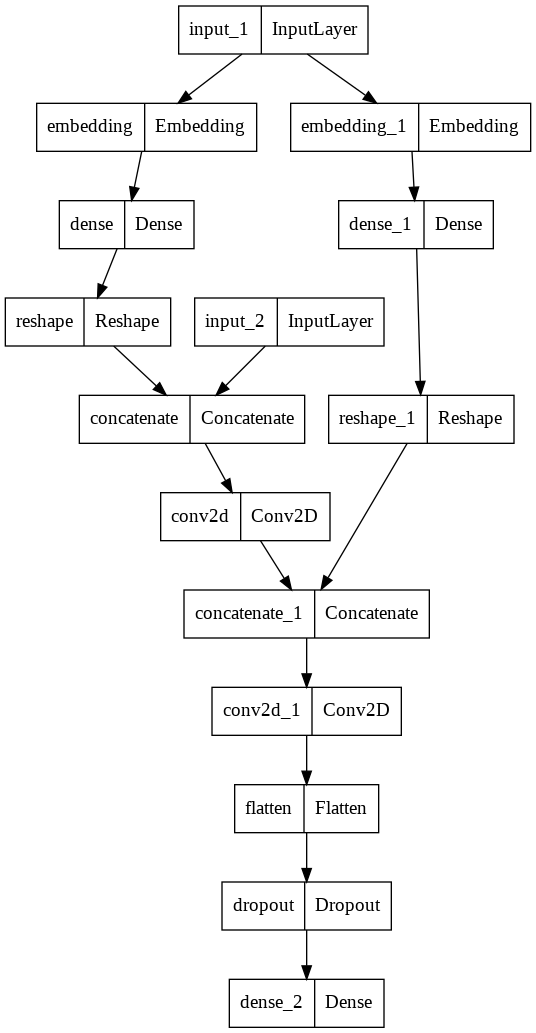

In [4]:
# plot the discriminator model
tf.keras.utils.plot_model(discriminator_model_temp)

In [5]:
def generator_model(latent_dimension = 100, number_of_class=10):


  # 1st layer

  # input label
  # input shape: (1,)
  # output shape: (7, 7, 1)
  input_label = tensorflow.keras.Input(shape=(1,))
  embedding_layer = tensorflow.keras.layers.Embedding(input_dim = number_of_class, output_dim = 50)(input_label)
  dense_layer = tensorflow.keras.layers.Dense(units = 7 * 7, activation='relu')(embedding_layer)
  reshape_label_layer = tensorflow.keras.layers.Reshape(target_shape = (7, 7, 1))(dense_layer)

  # input latent data
  # input shape: (100,)
  # output shape: (7, 7, 128)
  input_latent = tensorflow.keras.Input(shape=(latent_dimension,))
  dense_layer = tensorflow.keras.layers.Dense(units = 128 * 7 * 7, activation = 'relu')(input_latent)
  reshape_latent_layer = tensorflow.keras.layers.Reshape(target_shape = (7, 7, 128))(dense_layer)

  # concatenate 1
  # input shape: (7, 7, 128)+(7, 7, 1)
  # output shape: (7, 7, 129)
  merge_layer = tensorflow.keras.layers.Concatenate()([reshape_latent_layer, reshape_label_layer])





  # 2nd layer

  # input shape: (7, 7, 129)
  # output layer: (14, 14, 128)
  convolution_transpose_layer = tensorflow.keras.layers.Conv2DTranspose(filters = 128, kernel_size = (3,3), strides=(2,2), padding='same', activation = 'relu')(merge_layer)

  # input label
  # input shape: (1,)
  # output shape: (14, 14, 1)
  embedding_layer = tensorflow.keras.layers.Embedding(input_dim = number_of_class, output_dim = 50)(input_label)
  dense_layer = tensorflow.keras.layers.Dense(units = 14*14, activation='relu')(embedding_layer)
  reshape_layer = tensorflow.keras.layers.Reshape(target_shape = (14, 14, 1))(dense_layer)

  # concatenate 2
  # input shape: (14, 14, 128)+(14, 14, 1)
  # output shape: (14, 14, 129)
  merge_layer = tensorflow.keras.layers.Concatenate()([convolution_transpose_layer, reshape_layer])



  # 3rd layer
  # input shape: (14, 14, 129)
  # output shape: (28, 28, 128)
  convolution_transpose_layer = tensorflow.keras.layers.Conv2DTranspose(filters = 128, kernel_size = (3,3), strides=(2,2), padding='same', activation = 'relu')(merge_layer)


  # 4th and final layer
  # input shape: (28, 28, 128)
  # output shape: (28, 28, 1)
  convolution_layer = tensorflow.keras.layers.Conv2D(filters = 64,kernel_size = (3,3), activation='relu', padding='same')(convolution_transpose_layer)
  output_layer = tensorflow.keras.layers.Conv2D(filters = 1,kernel_size = (7,7), activation='tanh', padding='same')(convolution_layer)

  # connect full model
  model = tensorflow.keras.models.Model([input_latent, input_label], output_layer)
  return model


# call generator model
generator_model_temp = generator_model(latent_dimension = 100)
print(generator_model_temp.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 50)        500         ['input_3[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 6272)         633472      ['input_4[0][0]']                
                                                                                            

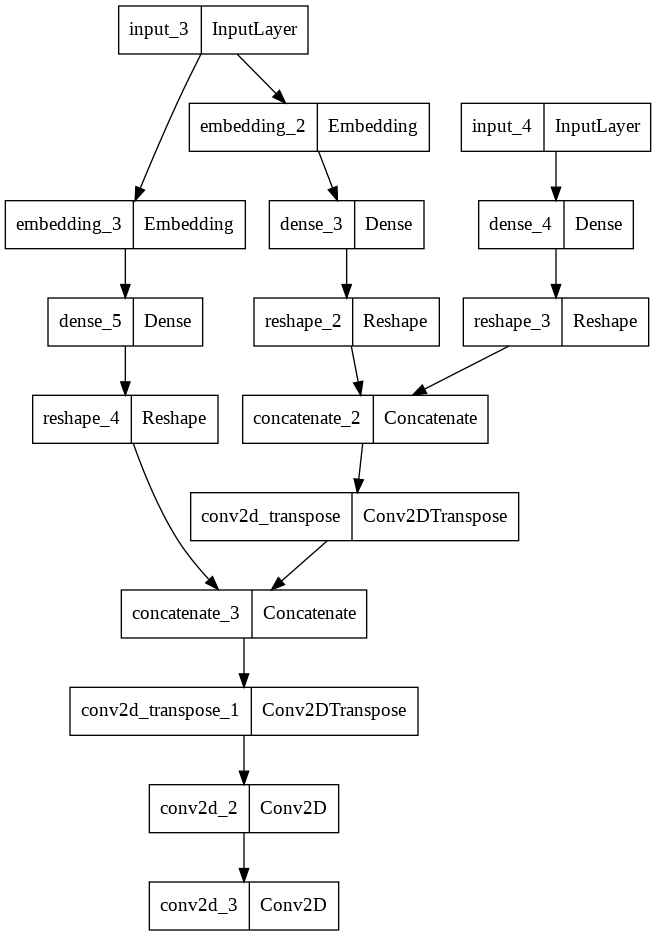

In [6]:
# plot the generator model
tf.keras.utils.plot_model(generator_model_temp)

In [7]:
def GAN_model(generator_model, discriminator_model):

  # disable discriminator model
  discriminator_model.trainable = False

  # get generator model activate
  generator_model_latent, generator_model_label = generator_model.input
  generator_model_output = generator_model.output

  # activate discriminator model
  # use generated data from generator to this discriminator
  discriminator_model_output = discriminator_model([generator_model_output, generator_model_label])

  # final model
  model = tf.keras.models.Model([generator_model_latent, generator_model_label], discriminator_model_output)

  # use optimizer and loss function
  opt = tf.keras.optimizers.Adam(learning_rate= 3e-4, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt,  metrics=['accuracy'])
  
  return model


GAN_model_temp = GAN_model(generator_model_temp, discriminator_model_temp)
print(GAN_model_temp.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 50)        500         ['input_3[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 6272)         633472      ['input_4[0][0]']                
                                                                                            

In [8]:
# plot GAN model
# tf.keras.utils.plot_model(GAN_model_temp)

In [9]:
def load_real_samples():
  # load dataset
  (trainX, trainy), (_, _) = tensorflow.keras.datasets.mnist.load_data()
  # expand to 3d, e.g. add channels
  trainX = trainX.reshape((trainX.shape[0], trainX.shape[1],trainX.shape[2], 1))
  trainX = trainX.astype('float32')
  # scale from [0,255] to [-1,1]
  trainX = (trainX - 127.5) / 127.5

  image,label = numpy.array(trainX), numpy.array(trainy)
  return [image, label]


k = load_real_samples()
print("image shape: ",k[0].shape," Label shape: ",k[1].shape)
print("\nshape/size of the first 16 data: ",k[0][:16].shape)

11501568/11490434 [==============================] - 0s 0us/step
image shape:  (60000, 28, 28, 1)  Label shape:  (60000,)

shape/size of the first 16 data:  (16, 28, 28, 1)


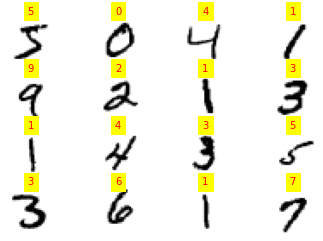

In [10]:
def plot_images(image,lebel,n=4):
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.title(str(lebel[i]),fontsize=10,color="red",fontweight=10,pad='2.0',backgroundcolor='yellow')
        plt.imshow(image[i,:,:,0], cmap = 'gray_r')
        plt.axis('off')
    plt.show()


# plot data
plot_images(k[0][:16], k[1][:16])

In [11]:
def generate_real_samples(image_dataset, number_of_sample):
	images, labels = image_dataset
	index = numpy.random.randint(0, images.shape[0], number_of_sample)
	modified_image, modified_label = images[index], labels[index]
	condition_output = numpy.ones((number_of_sample, 1))
	return [modified_image, modified_label], condition_output


d = generate_real_samples(k, number_of_sample = 32)
print("Generate real data as a batch randomly: ",d[0][0].shape, d[0][1].shape, d[1].shape)

Generate real data as a batch randomly:  (32, 28, 28, 1) (32,) (32, 1)


In [12]:
def generate_latent_points(latent_dimension, number_of_sample, number_of_class=10):
  latent_input = numpy.random.randn(latent_dimension * number_of_sample)
  reshape_latent_input = latent_input.reshape(number_of_sample, latent_dimension)
  labels = numpy.random.randint(0, number_of_class, number_of_sample)
  return [reshape_latent_input, labels]


p = generate_latent_points(latent_dimension=100, number_of_sample=32)
print("Generate latent point(with label) as a batch: ",p[0].shape,p[1].shape)

Generate latent point(with label) as a batch:  (32, 100) (32,)


In [13]:
def generate_fake_samples(generator_model, latent_dimension, number_of_sample):
	latent_input, labels_input = generate_latent_points(latent_dimension, number_of_sample)
	generated_images = generator_model.predict([latent_input, labels_input])
	condition = numpy.zeros((number_of_sample, 1))
	return [generated_images, labels_input], condition


with tf.device(device_name):
  kh = generate_fake_samples(generator_model_temp, 100, 32)
  print("shape of the generated images: ",kh[0][0].shape, kh[0][1].shape, kh[1].shape)

shape of the generated images:  (32, 28, 28, 1) (32,) (32, 1)


In [14]:
def summarize_generator_model(generator_model, latent_dimension = 100):
    # prepare points in latent space as input for the generator
    generated_latent_points, generated_labels = generate_latent_points(latent_dimension= 100, number_of_sample= 16)
    # generate images using generative model
    generated_images  = generator_model.predict([generated_latent_points, generated_labels])
    # scale from [-1,1] to [0,1]
    generated_images = (generated_images + 1) / 2.0
    # plot images
    plot_images(generated_images, generated_labels, n=4)

In [15]:
def train(generator_model, discriminator_model, GAN_model, dataset, latent_dim= 100, n_epochs=3, n_batch=128):

  # number of epoch
  print("No. of epoch: ",n_epochs)

  # batch per epoch
  bat_per_epo = int(dataset[0].shape[0] / n_batch)
  print("batch per epoch: ", bat_per_epo)

  # half batch
  half_batch = int(n_batch / 2)
  print("half batch: ", half_batch,'\n')
  print("*"*50,'\n\n')


  d_loss_real_array,d_loss_fake_array =[],[]
  g_loss_array = []
  # manually enumerate epochs
  for i in range(n_epochs):

    # loss record
    d_loss_r,d_loss_f = 0.0,0.0
    g_loss = 0.0
    
    # enumerate batches over the training set
    for j in range(bat_per_epo):

      # get randomly selected 'real' samples
      [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
      # update discriminator model weights
      d_loss1, _ = discriminator_model.train_on_batch([X_real, labels_real], y_real)
      # adding loss
      d_loss_r += d_loss1

      # generate 'fake' examples
      [X_fake, labels], y_fake = generate_fake_samples(generator_model, latent_dim, half_batch)
      # update discriminator model weights
      d_loss2, _ = discriminator_model.train_on_batch([X_fake, labels], y_fake)
      # adding loss
      d_loss_f += d_loss2

      # prepare points in latent space as input for the generator
      [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)

      # create inverted labels for the fake samples
      y_gan = ones((n_batch, 1))

      # update the generator via the discriminator's error
      g_loss1,_ = GAN_model.train_on_batch([z_input, labels_input], y_gan)
      # adding loss
      g_loss += g_loss1

    d_loss_real_array.append(d_loss_r)
    d_loss_fake_array.append(d_loss_f)
    g_loss_array.append(g_loss)

    # print the losses of both discriminator and generator model after each epoch
    print('epoch -> [%d/%d], discriminator_loss_for_real_data = %.2f, discriminator_loss_for_fake_data = %.2f, generator_loss = %.2f\n' %(i+1, n_epochs, d_loss_r, d_loss_f, g_loss))
    
    # summarize the generator model after each epoch
    summarize_generator_model(generator_model)

    np.savez_compressed('/content/loss_record.npz', a=d_loss_real_array, b=d_loss_fake_array, c=g_loss_array)

    # save the generator model
    # generator_model.save("generative_model_"+str(i)+".h5")
    print("\n")


READY TO GO !!!

No. of epoch:  250
batch per epoch:  468
half batch:  64 

************************************************** 


epoch -> [1/250], discriminator_loss_for_real_data = 278.66, discriminator_loss_for_fake_data = 290.10, generator_loss = 586.64



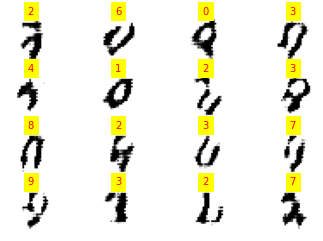



epoch -> [2/250], discriminator_loss_for_real_data = 305.16, discriminator_loss_for_fake_data = 309.71, generator_loss = 378.70



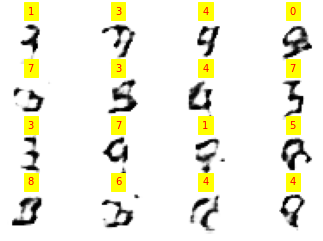



epoch -> [3/250], discriminator_loss_for_real_data = 309.38, discriminator_loss_for_fake_data = 317.03, generator_loss = 358.77



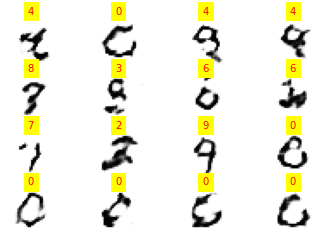



epoch -> [4/250], discriminator_loss_for_real_data = 313.03, discriminator_loss_for_fake_data = 315.22, generator_loss = 355.39



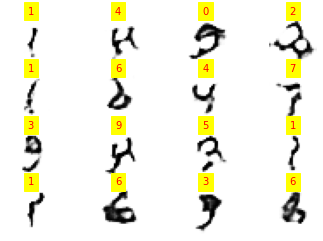



epoch -> [5/250], discriminator_loss_for_real_data = 309.10, discriminator_loss_for_fake_data = 313.47, generator_loss = 360.26



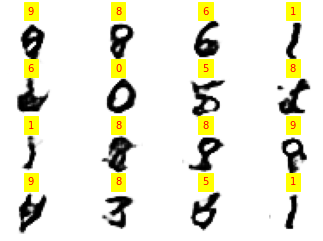



epoch -> [6/250], discriminator_loss_for_real_data = 304.08, discriminator_loss_for_fake_data = 308.44, generator_loss = 373.76



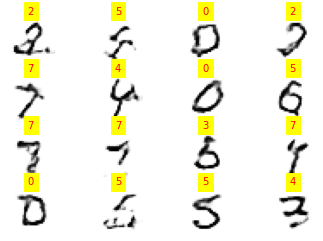



epoch -> [7/250], discriminator_loss_for_real_data = 301.50, discriminator_loss_for_fake_data = 305.88, generator_loss = 379.75



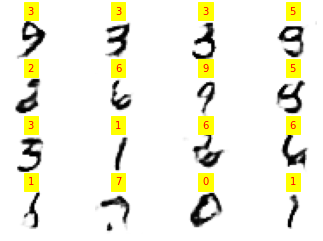



epoch -> [8/250], discriminator_loss_for_real_data = 301.97, discriminator_loss_for_fake_data = 306.34, generator_loss = 384.31



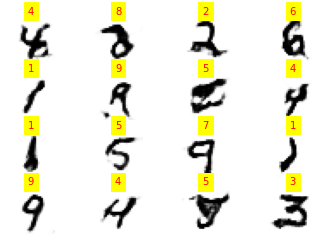



epoch -> [9/250], discriminator_loss_for_real_data = 303.94, discriminator_loss_for_fake_data = 308.06, generator_loss = 382.78



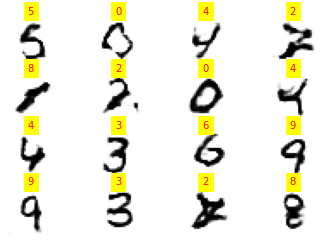



epoch -> [10/250], discriminator_loss_for_real_data = 308.76, discriminator_loss_for_fake_data = 311.48, generator_loss = 376.49



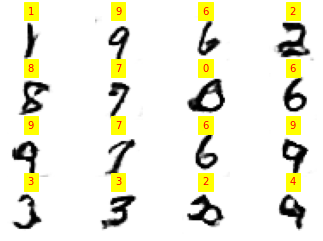



epoch -> [11/250], discriminator_loss_for_real_data = 310.92, discriminator_loss_for_fake_data = 312.77, generator_loss = 371.35



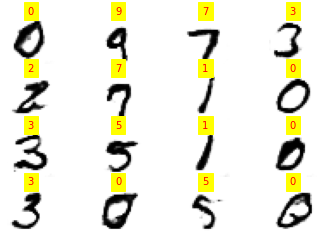



epoch -> [12/250], discriminator_loss_for_real_data = 313.02, discriminator_loss_for_fake_data = 314.23, generator_loss = 366.73



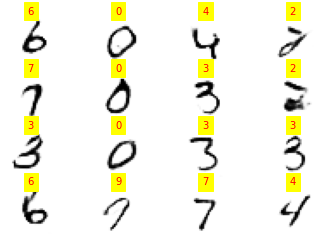



epoch -> [13/250], discriminator_loss_for_real_data = 314.37, discriminator_loss_for_fake_data = 314.60, generator_loss = 364.60



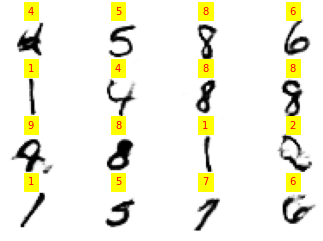



epoch -> [14/250], discriminator_loss_for_real_data = 314.43, discriminator_loss_for_fake_data = 315.63, generator_loss = 362.04



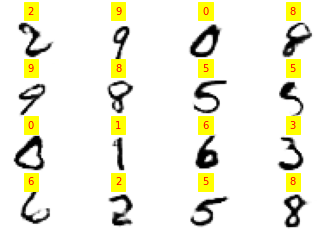



epoch -> [15/250], discriminator_loss_for_real_data = 315.89, discriminator_loss_for_fake_data = 316.48, generator_loss = 359.61



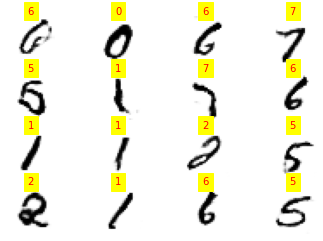



epoch -> [16/250], discriminator_loss_for_real_data = 315.99, discriminator_loss_for_fake_data = 316.50, generator_loss = 358.92



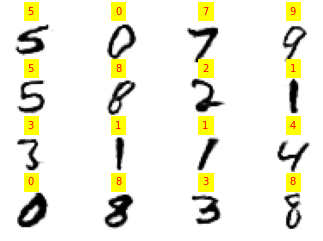



epoch -> [17/250], discriminator_loss_for_real_data = 316.27, discriminator_loss_for_fake_data = 317.16, generator_loss = 355.88



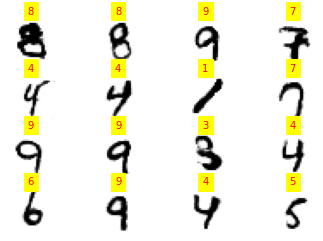



epoch -> [18/250], discriminator_loss_for_real_data = 316.62, discriminator_loss_for_fake_data = 317.32, generator_loss = 355.65



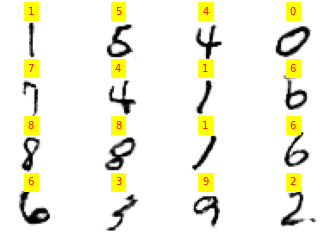



epoch -> [19/250], discriminator_loss_for_real_data = 317.16, discriminator_loss_for_fake_data = 317.41, generator_loss = 355.11



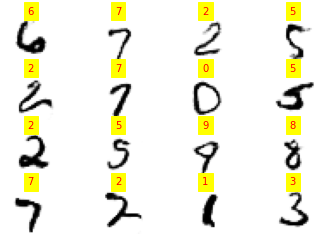



epoch -> [20/250], discriminator_loss_for_real_data = 316.81, discriminator_loss_for_fake_data = 318.00, generator_loss = 354.42



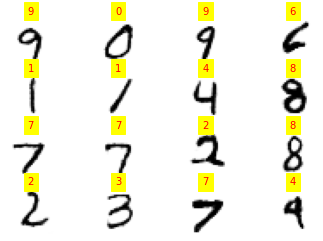



epoch -> [21/250], discriminator_loss_for_real_data = 317.29, discriminator_loss_for_fake_data = 318.28, generator_loss = 353.16



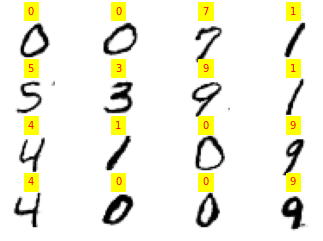



epoch -> [22/250], discriminator_loss_for_real_data = 317.47, discriminator_loss_for_fake_data = 317.89, generator_loss = 352.68



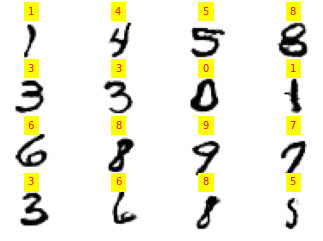



epoch -> [23/250], discriminator_loss_for_real_data = 317.33, discriminator_loss_for_fake_data = 318.63, generator_loss = 352.00



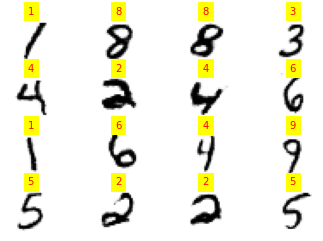



epoch -> [24/250], discriminator_loss_for_real_data = 318.49, discriminator_loss_for_fake_data = 318.01, generator_loss = 352.97



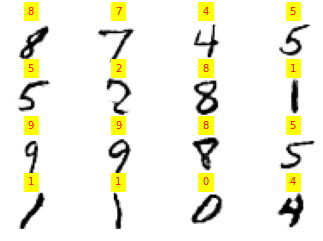



epoch -> [25/250], discriminator_loss_for_real_data = 317.49, discriminator_loss_for_fake_data = 318.13, generator_loss = 352.20



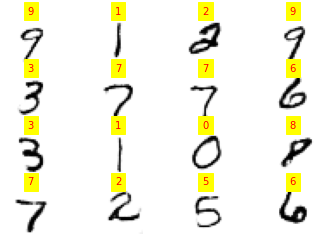



epoch -> [26/250], discriminator_loss_for_real_data = 316.84, discriminator_loss_for_fake_data = 317.69, generator_loss = 353.77



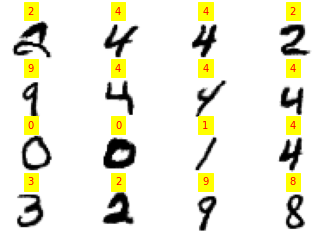



epoch -> [27/250], discriminator_loss_for_real_data = 317.00, discriminator_loss_for_fake_data = 317.08, generator_loss = 354.59



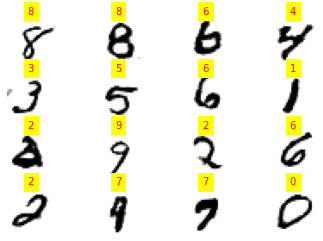



epoch -> [28/250], discriminator_loss_for_real_data = 316.97, discriminator_loss_for_fake_data = 317.34, generator_loss = 353.84



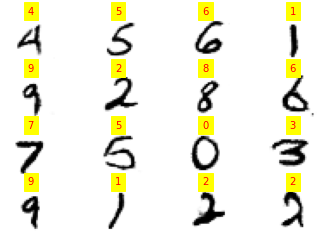



epoch -> [29/250], discriminator_loss_for_real_data = 317.01, discriminator_loss_for_fake_data = 317.13, generator_loss = 354.88



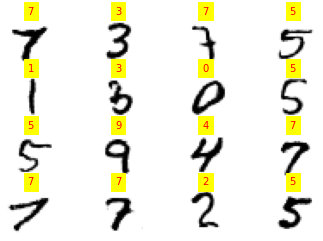



epoch -> [30/250], discriminator_loss_for_real_data = 316.61, discriminator_loss_for_fake_data = 316.76, generator_loss = 355.22



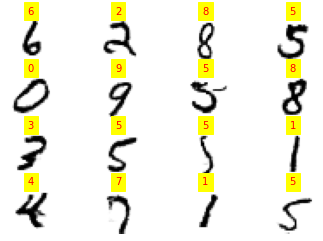



epoch -> [31/250], discriminator_loss_for_real_data = 316.93, discriminator_loss_for_fake_data = 316.49, generator_loss = 354.95



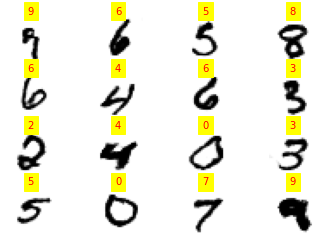



epoch -> [32/250], discriminator_loss_for_real_data = 317.17, discriminator_loss_for_fake_data = 316.84, generator_loss = 355.10



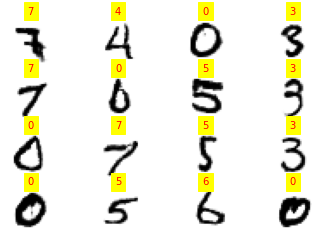



epoch -> [33/250], discriminator_loss_for_real_data = 316.90, discriminator_loss_for_fake_data = 317.09, generator_loss = 354.06



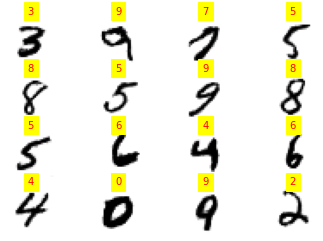



epoch -> [34/250], discriminator_loss_for_real_data = 316.70, discriminator_loss_for_fake_data = 316.60, generator_loss = 355.61



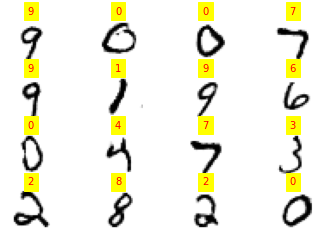



epoch -> [35/250], discriminator_loss_for_real_data = 317.06, discriminator_loss_for_fake_data = 316.52, generator_loss = 355.32



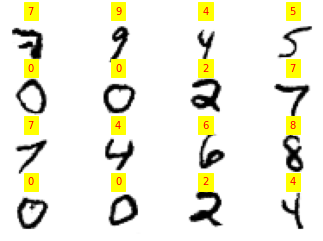



epoch -> [36/250], discriminator_loss_for_real_data = 317.01, discriminator_loss_for_fake_data = 316.82, generator_loss = 355.11



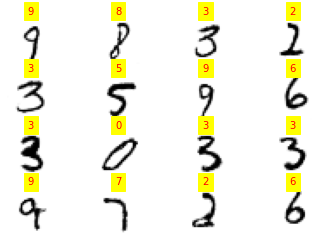



epoch -> [37/250], discriminator_loss_for_real_data = 317.29, discriminator_loss_for_fake_data = 316.78, generator_loss = 353.86



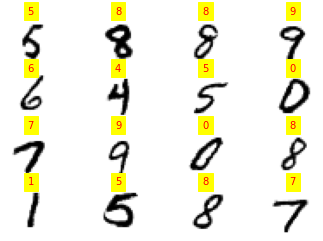



epoch -> [38/250], discriminator_loss_for_real_data = 317.51, discriminator_loss_for_fake_data = 317.00, generator_loss = 354.22



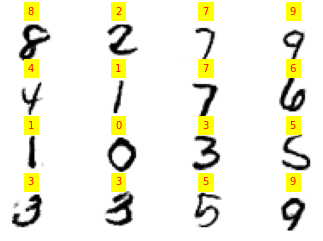



epoch -> [39/250], discriminator_loss_for_real_data = 317.61, discriminator_loss_for_fake_data = 317.02, generator_loss = 353.81



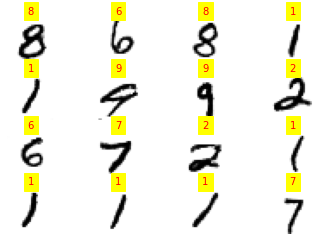



epoch -> [40/250], discriminator_loss_for_real_data = 317.38, discriminator_loss_for_fake_data = 316.75, generator_loss = 353.96



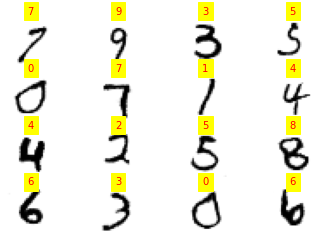



epoch -> [41/250], discriminator_loss_for_real_data = 317.39, discriminator_loss_for_fake_data = 316.65, generator_loss = 354.63



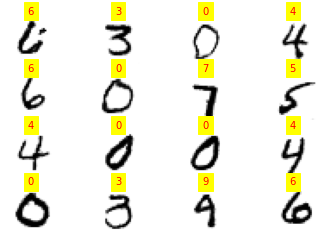



epoch -> [42/250], discriminator_loss_for_real_data = 316.89, discriminator_loss_for_fake_data = 316.71, generator_loss = 354.44



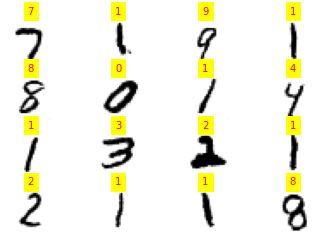



epoch -> [43/250], discriminator_loss_for_real_data = 317.36, discriminator_loss_for_fake_data = 317.09, generator_loss = 353.21



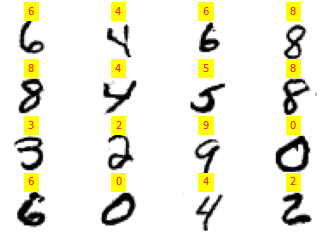



epoch -> [44/250], discriminator_loss_for_real_data = 317.47, discriminator_loss_for_fake_data = 317.38, generator_loss = 353.84



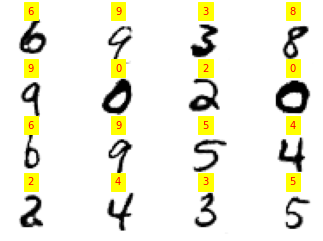



epoch -> [45/250], discriminator_loss_for_real_data = 317.04, discriminator_loss_for_fake_data = 316.90, generator_loss = 354.54



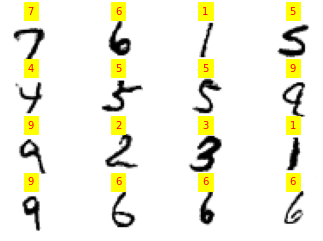



epoch -> [46/250], discriminator_loss_for_real_data = 317.80, discriminator_loss_for_fake_data = 316.96, generator_loss = 353.26



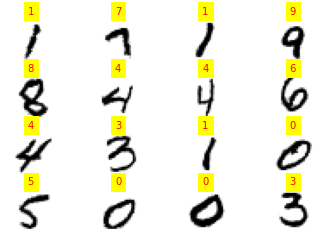



epoch -> [47/250], discriminator_loss_for_real_data = 317.02, discriminator_loss_for_fake_data = 317.52, generator_loss = 352.05



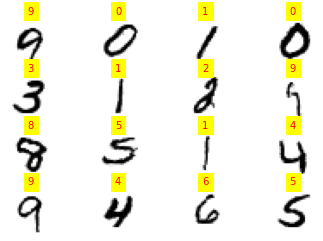



epoch -> [48/250], discriminator_loss_for_real_data = 317.63, discriminator_loss_for_fake_data = 317.05, generator_loss = 351.86



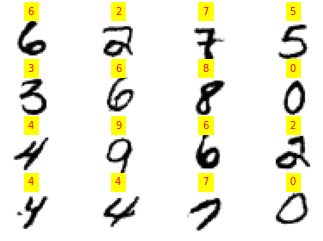



epoch -> [49/250], discriminator_loss_for_real_data = 317.74, discriminator_loss_for_fake_data = 316.94, generator_loss = 352.36



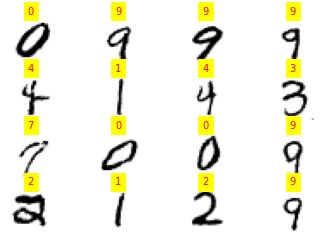



epoch -> [50/250], discriminator_loss_for_real_data = 317.20, discriminator_loss_for_fake_data = 317.53, generator_loss = 351.37



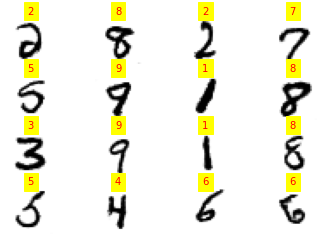



epoch -> [51/250], discriminator_loss_for_real_data = 318.22, discriminator_loss_for_fake_data = 317.54, generator_loss = 351.63



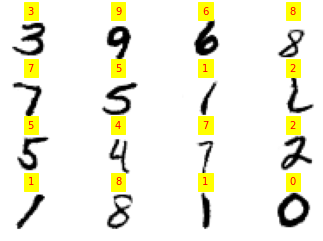



epoch -> [52/250], discriminator_loss_for_real_data = 317.27, discriminator_loss_for_fake_data = 318.20, generator_loss = 350.75



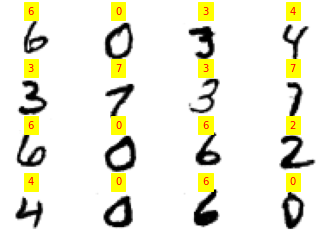



epoch -> [53/250], discriminator_loss_for_real_data = 317.25, discriminator_loss_for_fake_data = 317.61, generator_loss = 350.87



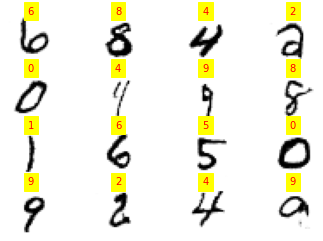



epoch -> [54/250], discriminator_loss_for_real_data = 318.03, discriminator_loss_for_fake_data = 317.94, generator_loss = 350.48



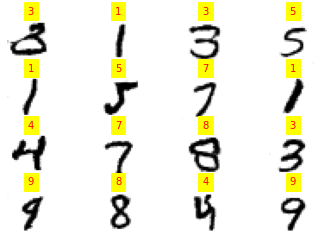



epoch -> [55/250], discriminator_loss_for_real_data = 317.97, discriminator_loss_for_fake_data = 317.27, generator_loss = 350.59



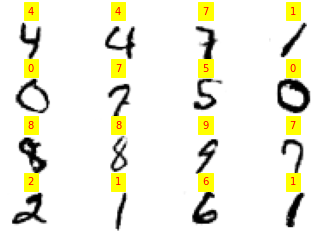



epoch -> [56/250], discriminator_loss_for_real_data = 318.26, discriminator_loss_for_fake_data = 316.99, generator_loss = 351.18



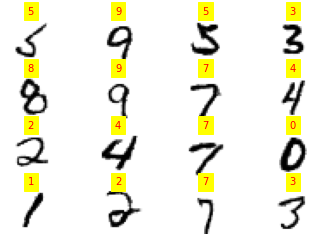



epoch -> [57/250], discriminator_loss_for_real_data = 317.11, discriminator_loss_for_fake_data = 317.50, generator_loss = 350.90



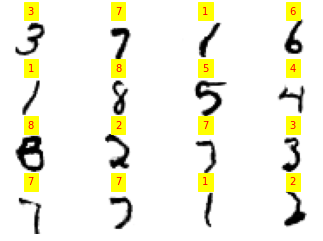



epoch -> [58/250], discriminator_loss_for_real_data = 317.05, discriminator_loss_for_fake_data = 317.68, generator_loss = 350.75



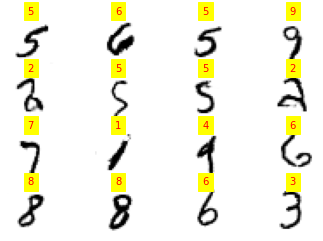



epoch -> [59/250], discriminator_loss_for_real_data = 316.97, discriminator_loss_for_fake_data = 317.64, generator_loss = 350.48



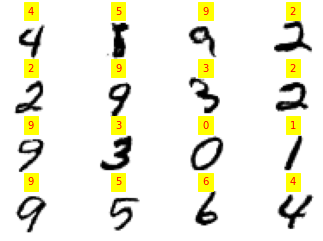



epoch -> [60/250], discriminator_loss_for_real_data = 317.31, discriminator_loss_for_fake_data = 317.33, generator_loss = 351.28



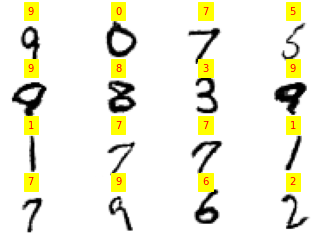



epoch -> [61/250], discriminator_loss_for_real_data = 317.36, discriminator_loss_for_fake_data = 316.85, generator_loss = 351.31



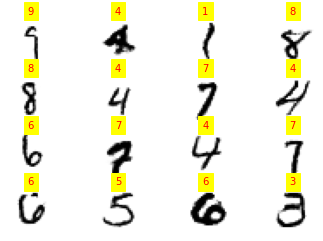



epoch -> [62/250], discriminator_loss_for_real_data = 317.78, discriminator_loss_for_fake_data = 316.62, generator_loss = 351.18



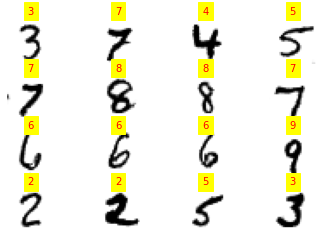



epoch -> [63/250], discriminator_loss_for_real_data = 316.92, discriminator_loss_for_fake_data = 317.01, generator_loss = 351.79



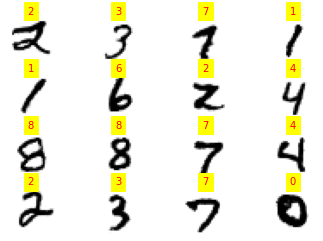



epoch -> [64/250], discriminator_loss_for_real_data = 316.65, discriminator_loss_for_fake_data = 317.60, generator_loss = 350.72



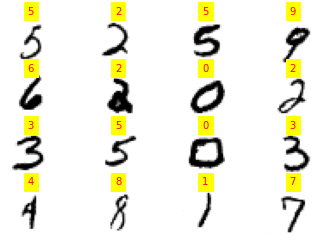



epoch -> [65/250], discriminator_loss_for_real_data = 316.91, discriminator_loss_for_fake_data = 316.26, generator_loss = 352.05



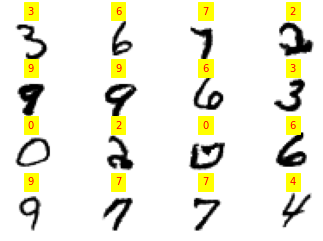



epoch -> [66/250], discriminator_loss_for_real_data = 317.14, discriminator_loss_for_fake_data = 316.32, generator_loss = 353.10



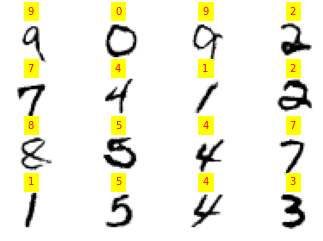



epoch -> [67/250], discriminator_loss_for_real_data = 316.25, discriminator_loss_for_fake_data = 316.12, generator_loss = 352.58



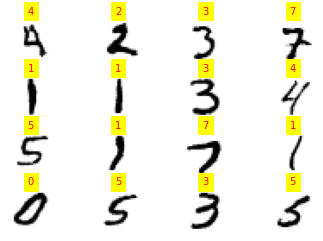



epoch -> [68/250], discriminator_loss_for_real_data = 315.16, discriminator_loss_for_fake_data = 316.99, generator_loss = 351.76



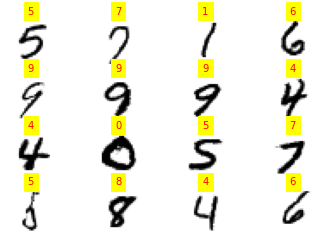



epoch -> [69/250], discriminator_loss_for_real_data = 316.57, discriminator_loss_for_fake_data = 316.50, generator_loss = 352.01



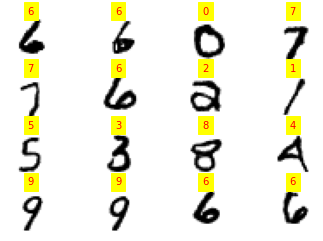



epoch -> [70/250], discriminator_loss_for_real_data = 315.57, discriminator_loss_for_fake_data = 316.38, generator_loss = 352.77



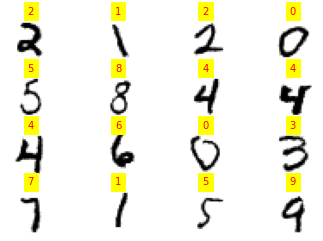



epoch -> [71/250], discriminator_loss_for_real_data = 315.72, discriminator_loss_for_fake_data = 316.17, generator_loss = 353.76



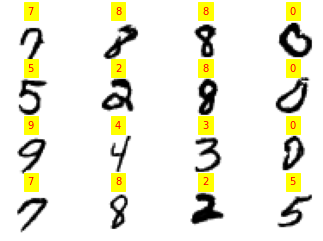



epoch -> [72/250], discriminator_loss_for_real_data = 315.56, discriminator_loss_for_fake_data = 315.49, generator_loss = 353.83



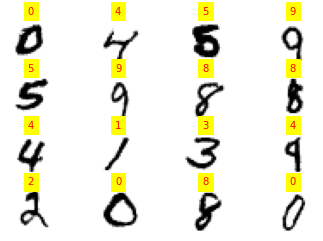



epoch -> [73/250], discriminator_loss_for_real_data = 315.15, discriminator_loss_for_fake_data = 316.16, generator_loss = 354.52



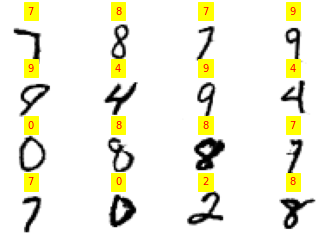



epoch -> [74/250], discriminator_loss_for_real_data = 314.75, discriminator_loss_for_fake_data = 315.35, generator_loss = 354.90



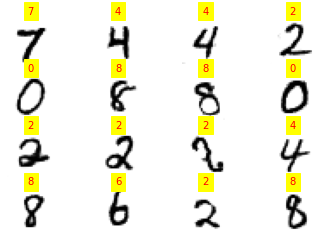



epoch -> [75/250], discriminator_loss_for_real_data = 315.59, discriminator_loss_for_fake_data = 315.41, generator_loss = 353.32



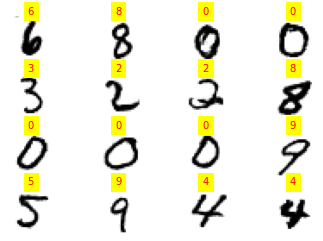



epoch -> [76/250], discriminator_loss_for_real_data = 315.74, discriminator_loss_for_fake_data = 315.71, generator_loss = 354.34



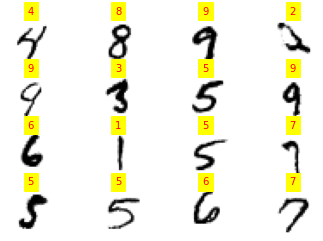



epoch -> [77/250], discriminator_loss_for_real_data = 315.72, discriminator_loss_for_fake_data = 314.98, generator_loss = 354.99



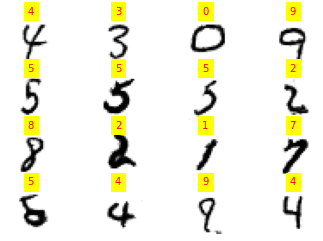



epoch -> [78/250], discriminator_loss_for_real_data = 316.01, discriminator_loss_for_fake_data = 315.44, generator_loss = 354.64



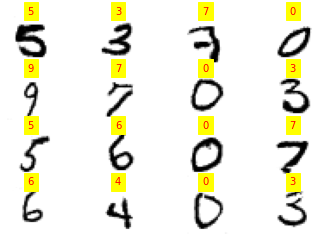



epoch -> [79/250], discriminator_loss_for_real_data = 315.24, discriminator_loss_for_fake_data = 314.58, generator_loss = 354.75



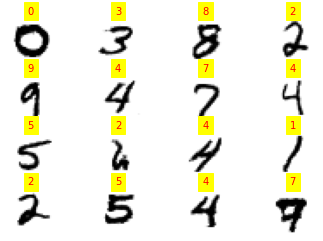



epoch -> [80/250], discriminator_loss_for_real_data = 314.41, discriminator_loss_for_fake_data = 314.69, generator_loss = 355.22



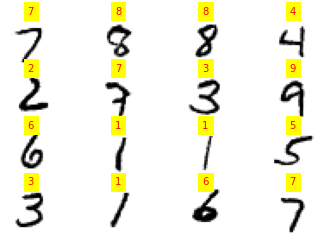



epoch -> [81/250], discriminator_loss_for_real_data = 315.00, discriminator_loss_for_fake_data = 314.18, generator_loss = 356.65



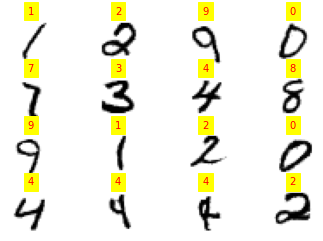



epoch -> [82/250], discriminator_loss_for_real_data = 313.77, discriminator_loss_for_fake_data = 313.98, generator_loss = 358.45



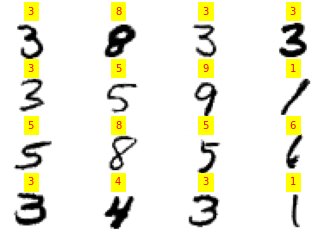



epoch -> [83/250], discriminator_loss_for_real_data = 314.67, discriminator_loss_for_fake_data = 314.45, generator_loss = 356.15



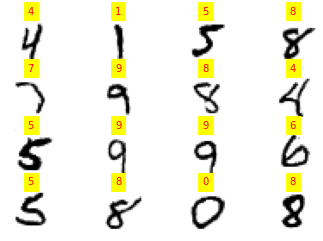



epoch -> [84/250], discriminator_loss_for_real_data = 313.87, discriminator_loss_for_fake_data = 313.84, generator_loss = 356.55



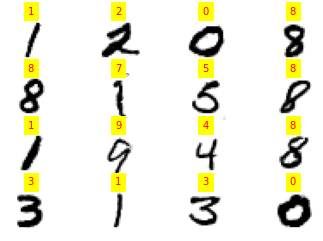



epoch -> [85/250], discriminator_loss_for_real_data = 314.08, discriminator_loss_for_fake_data = 314.04, generator_loss = 357.71



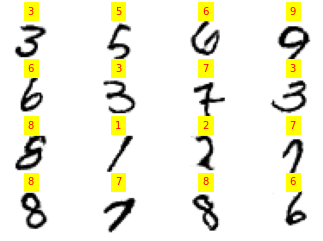



epoch -> [86/250], discriminator_loss_for_real_data = 314.28, discriminator_loss_for_fake_data = 314.10, generator_loss = 356.94



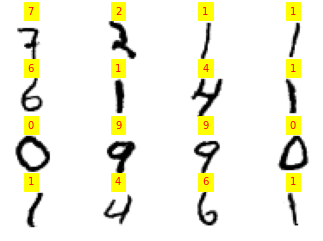



epoch -> [87/250], discriminator_loss_for_real_data = 314.12, discriminator_loss_for_fake_data = 313.83, generator_loss = 357.09



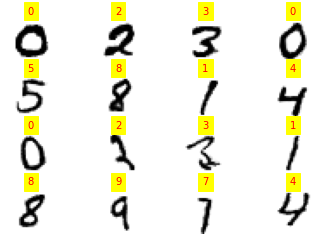



epoch -> [88/250], discriminator_loss_for_real_data = 313.35, discriminator_loss_for_fake_data = 313.12, generator_loss = 358.04



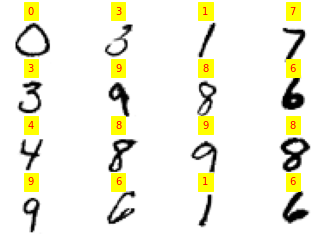



epoch -> [89/250], discriminator_loss_for_real_data = 313.75, discriminator_loss_for_fake_data = 313.32, generator_loss = 358.18



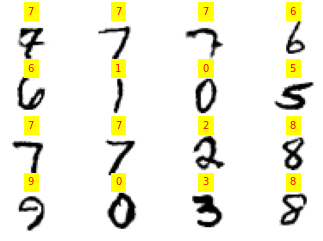



epoch -> [90/250], discriminator_loss_for_real_data = 312.83, discriminator_loss_for_fake_data = 313.30, generator_loss = 358.20



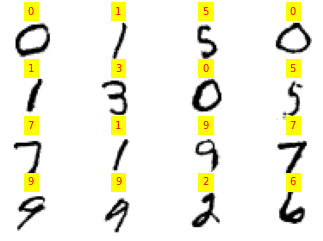



epoch -> [91/250], discriminator_loss_for_real_data = 313.54, discriminator_loss_for_fake_data = 312.73, generator_loss = 359.74



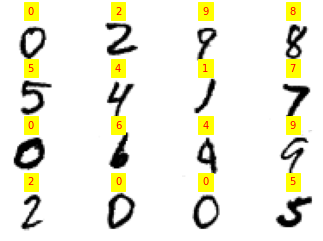



epoch -> [92/250], discriminator_loss_for_real_data = 313.13, discriminator_loss_for_fake_data = 311.69, generator_loss = 360.59



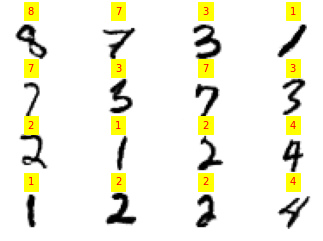



epoch -> [93/250], discriminator_loss_for_real_data = 313.28, discriminator_loss_for_fake_data = 312.14, generator_loss = 361.41



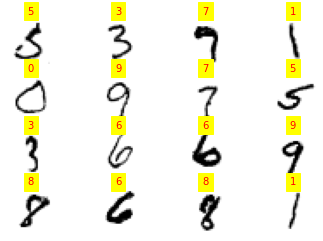



epoch -> [94/250], discriminator_loss_for_real_data = 312.67, discriminator_loss_for_fake_data = 312.39, generator_loss = 361.00



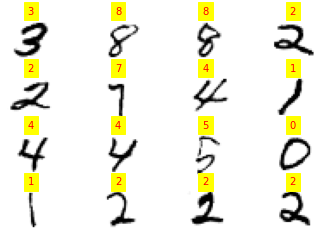



epoch -> [95/250], discriminator_loss_for_real_data = 311.74, discriminator_loss_for_fake_data = 311.17, generator_loss = 362.17



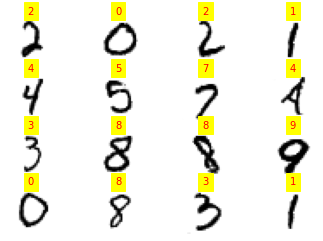



epoch -> [96/250], discriminator_loss_for_real_data = 312.20, discriminator_loss_for_fake_data = 312.01, generator_loss = 361.98



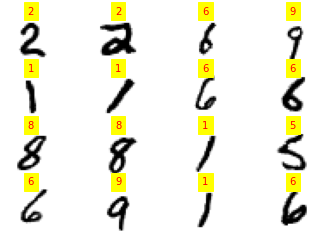



epoch -> [97/250], discriminator_loss_for_real_data = 311.91, discriminator_loss_for_fake_data = 311.46, generator_loss = 363.29



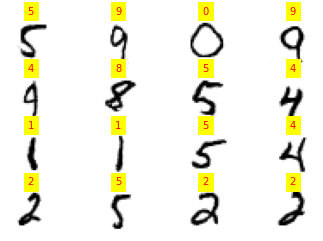



epoch -> [98/250], discriminator_loss_for_real_data = 312.52, discriminator_loss_for_fake_data = 310.25, generator_loss = 365.23



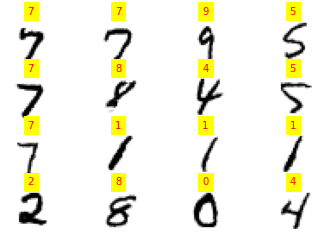



epoch -> [99/250], discriminator_loss_for_real_data = 312.35, discriminator_loss_for_fake_data = 310.49, generator_loss = 364.86



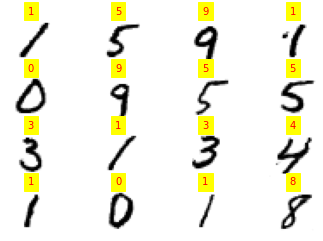



epoch -> [100/250], discriminator_loss_for_real_data = 311.39, discriminator_loss_for_fake_data = 310.48, generator_loss = 365.06



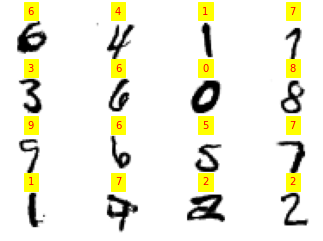



epoch -> [101/250], discriminator_loss_for_real_data = 311.15, discriminator_loss_for_fake_data = 309.89, generator_loss = 365.98



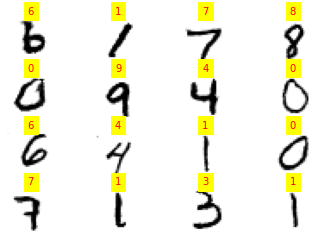



epoch -> [102/250], discriminator_loss_for_real_data = 311.22, discriminator_loss_for_fake_data = 310.30, generator_loss = 365.95



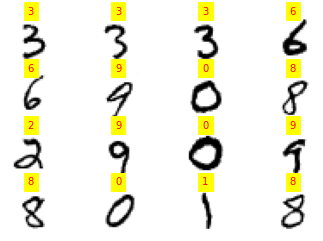



epoch -> [103/250], discriminator_loss_for_real_data = 310.80, discriminator_loss_for_fake_data = 310.01, generator_loss = 365.81



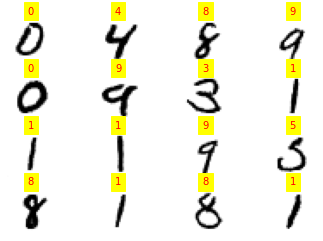



epoch -> [104/250], discriminator_loss_for_real_data = 310.80, discriminator_loss_for_fake_data = 309.87, generator_loss = 365.64



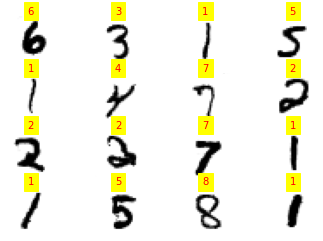



epoch -> [105/250], discriminator_loss_for_real_data = 309.83, discriminator_loss_for_fake_data = 309.46, generator_loss = 367.93



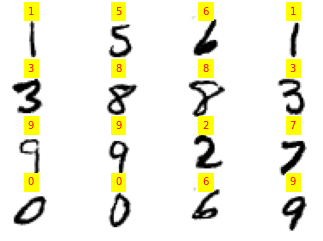



epoch -> [106/250], discriminator_loss_for_real_data = 310.31, discriminator_loss_for_fake_data = 309.71, generator_loss = 366.92



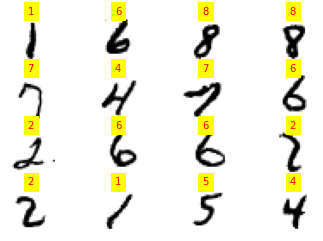



epoch -> [107/250], discriminator_loss_for_real_data = 310.39, discriminator_loss_for_fake_data = 309.56, generator_loss = 368.34



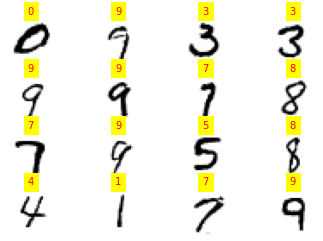



epoch -> [108/250], discriminator_loss_for_real_data = 310.24, discriminator_loss_for_fake_data = 308.69, generator_loss = 370.07



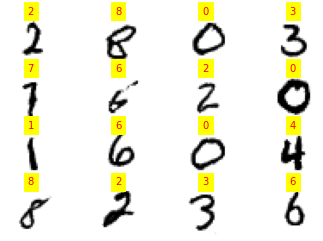



epoch -> [109/250], discriminator_loss_for_real_data = 309.91, discriminator_loss_for_fake_data = 308.80, generator_loss = 369.10



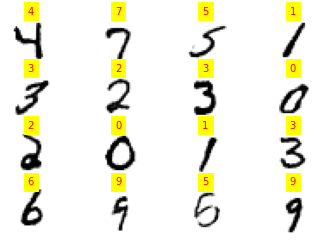



epoch -> [110/250], discriminator_loss_for_real_data = 309.34, discriminator_loss_for_fake_data = 309.94, generator_loss = 368.15



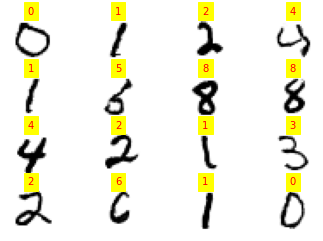



epoch -> [111/250], discriminator_loss_for_real_data = 310.87, discriminator_loss_for_fake_data = 308.31, generator_loss = 371.56



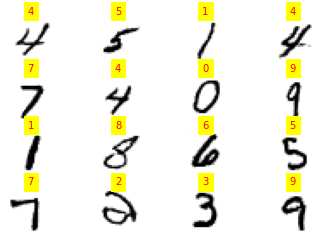



epoch -> [112/250], discriminator_loss_for_real_data = 309.28, discriminator_loss_for_fake_data = 308.25, generator_loss = 370.07



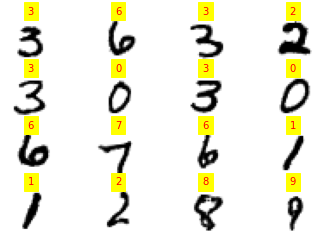



epoch -> [113/250], discriminator_loss_for_real_data = 309.99, discriminator_loss_for_fake_data = 307.61, generator_loss = 371.91



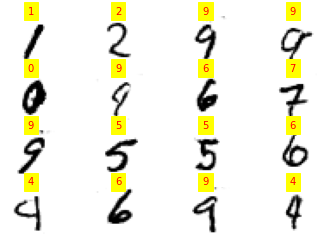



epoch -> [114/250], discriminator_loss_for_real_data = 308.49, discriminator_loss_for_fake_data = 307.67, generator_loss = 371.88



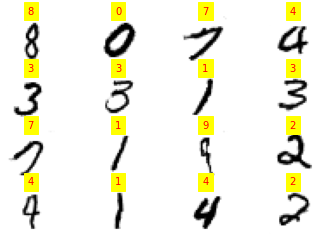



epoch -> [115/250], discriminator_loss_for_real_data = 308.14, discriminator_loss_for_fake_data = 307.97, generator_loss = 372.11



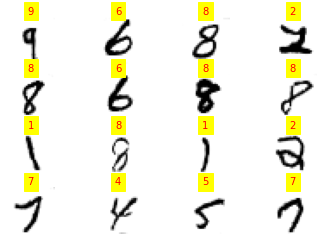



epoch -> [116/250], discriminator_loss_for_real_data = 308.56, discriminator_loss_for_fake_data = 307.01, generator_loss = 373.82



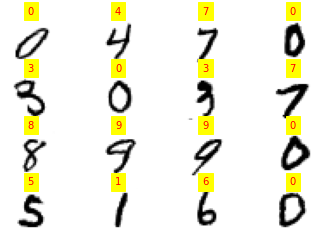



epoch -> [117/250], discriminator_loss_for_real_data = 308.32, discriminator_loss_for_fake_data = 305.91, generator_loss = 375.00



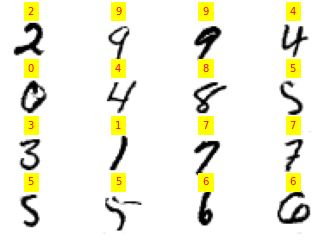



epoch -> [118/250], discriminator_loss_for_real_data = 306.49, discriminator_loss_for_fake_data = 307.55, generator_loss = 373.83



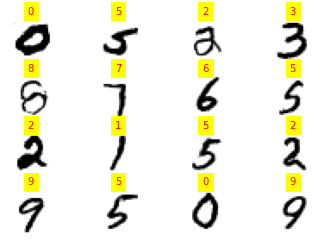



epoch -> [119/250], discriminator_loss_for_real_data = 307.61, discriminator_loss_for_fake_data = 305.87, generator_loss = 375.39



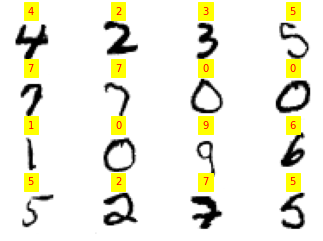



epoch -> [120/250], discriminator_loss_for_real_data = 307.89, discriminator_loss_for_fake_data = 306.24, generator_loss = 375.00



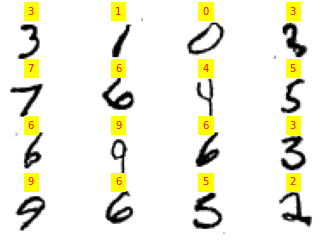



epoch -> [121/250], discriminator_loss_for_real_data = 308.39, discriminator_loss_for_fake_data = 306.22, generator_loss = 374.88



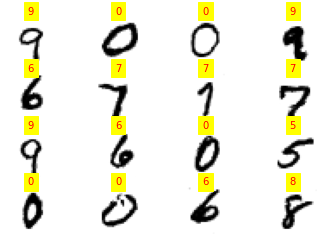



epoch -> [122/250], discriminator_loss_for_real_data = 307.68, discriminator_loss_for_fake_data = 305.71, generator_loss = 375.49



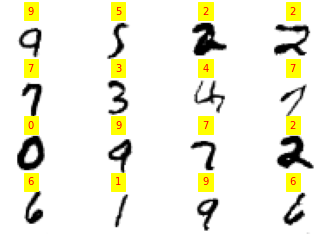



epoch -> [123/250], discriminator_loss_for_real_data = 307.57, discriminator_loss_for_fake_data = 305.29, generator_loss = 377.97



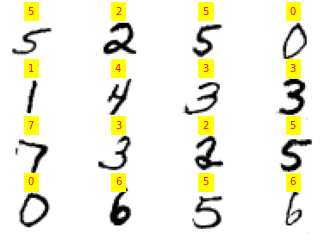



epoch -> [124/250], discriminator_loss_for_real_data = 306.58, discriminator_loss_for_fake_data = 304.59, generator_loss = 378.64



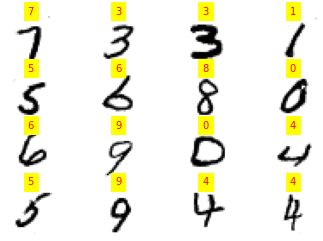



epoch -> [125/250], discriminator_loss_for_real_data = 306.87, discriminator_loss_for_fake_data = 304.45, generator_loss = 378.35



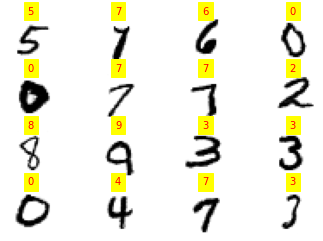



epoch -> [126/250], discriminator_loss_for_real_data = 305.71, discriminator_loss_for_fake_data = 303.84, generator_loss = 381.69



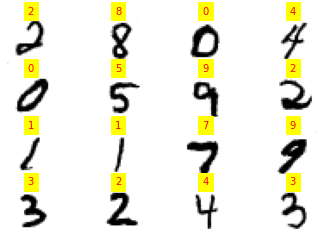



epoch -> [127/250], discriminator_loss_for_real_data = 306.41, discriminator_loss_for_fake_data = 303.87, generator_loss = 379.70



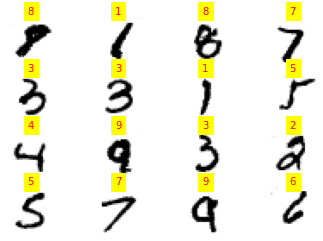



epoch -> [128/250], discriminator_loss_for_real_data = 305.11, discriminator_loss_for_fake_data = 303.46, generator_loss = 381.78



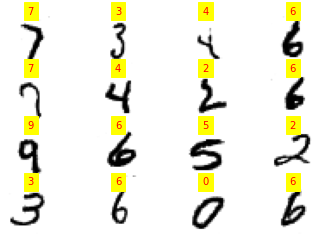



epoch -> [129/250], discriminator_loss_for_real_data = 305.14, discriminator_loss_for_fake_data = 303.52, generator_loss = 381.89



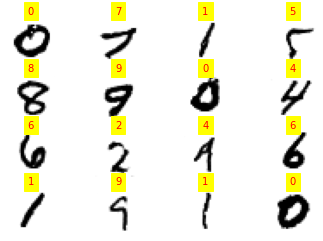



epoch -> [130/250], discriminator_loss_for_real_data = 304.00, discriminator_loss_for_fake_data = 302.23, generator_loss = 383.53



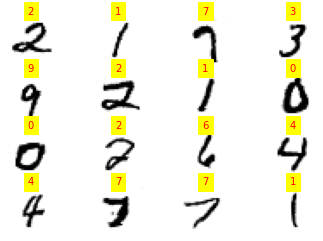



epoch -> [131/250], discriminator_loss_for_real_data = 305.42, discriminator_loss_for_fake_data = 302.01, generator_loss = 385.67



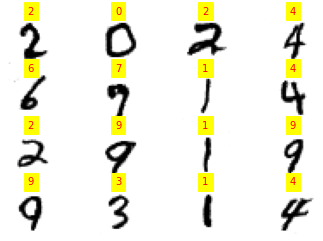



epoch -> [132/250], discriminator_loss_for_real_data = 304.66, discriminator_loss_for_fake_data = 302.14, generator_loss = 384.52



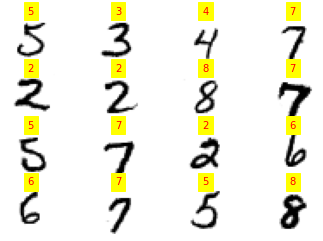



epoch -> [133/250], discriminator_loss_for_real_data = 302.88, discriminator_loss_for_fake_data = 301.26, generator_loss = 386.29



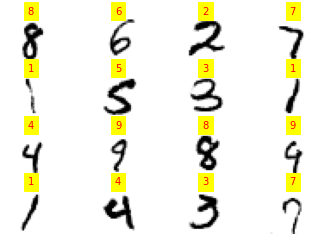



epoch -> [134/250], discriminator_loss_for_real_data = 302.25, discriminator_loss_for_fake_data = 300.37, generator_loss = 388.12



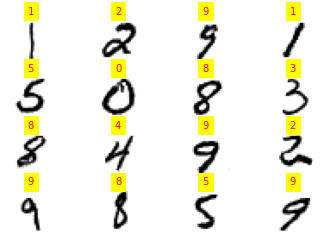



epoch -> [135/250], discriminator_loss_for_real_data = 303.68, discriminator_loss_for_fake_data = 299.21, generator_loss = 389.45



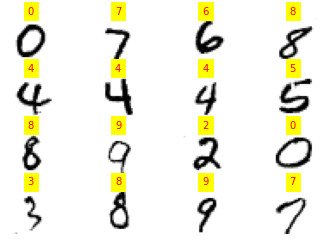



epoch -> [136/250], discriminator_loss_for_real_data = 302.96, discriminator_loss_for_fake_data = 299.93, generator_loss = 389.93



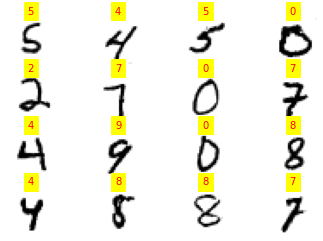



epoch -> [137/250], discriminator_loss_for_real_data = 300.87, discriminator_loss_for_fake_data = 299.04, generator_loss = 391.37



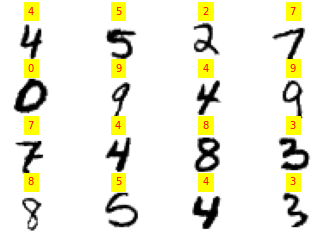



epoch -> [138/250], discriminator_loss_for_real_data = 301.89, discriminator_loss_for_fake_data = 298.54, generator_loss = 391.32



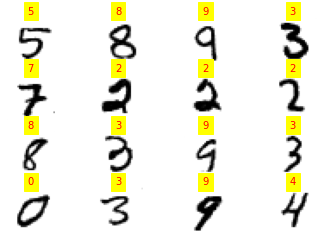



epoch -> [139/250], discriminator_loss_for_real_data = 301.42, discriminator_loss_for_fake_data = 297.70, generator_loss = 393.48



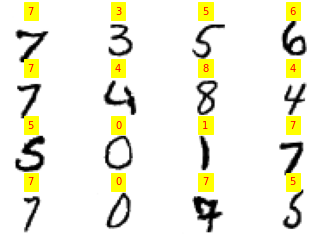



epoch -> [140/250], discriminator_loss_for_real_data = 300.29, discriminator_loss_for_fake_data = 298.01, generator_loss = 392.58



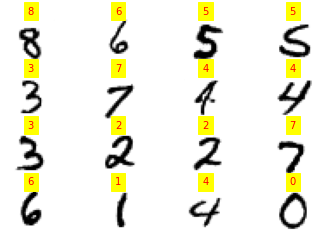



epoch -> [141/250], discriminator_loss_for_real_data = 300.52, discriminator_loss_for_fake_data = 298.04, generator_loss = 393.97



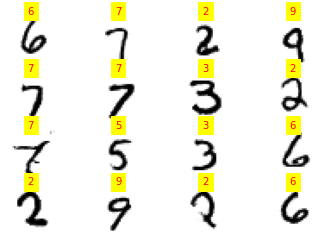



epoch -> [142/250], discriminator_loss_for_real_data = 300.53, discriminator_loss_for_fake_data = 296.73, generator_loss = 395.84



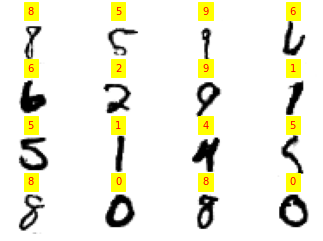



epoch -> [143/250], discriminator_loss_for_real_data = 299.37, discriminator_loss_for_fake_data = 296.13, generator_loss = 397.53



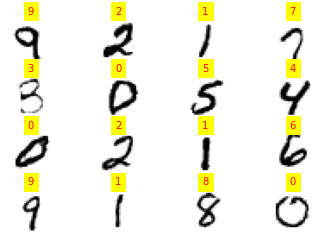



epoch -> [144/250], discriminator_loss_for_real_data = 300.62, discriminator_loss_for_fake_data = 297.31, generator_loss = 397.11



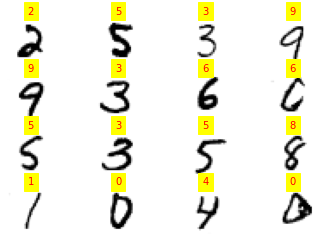



epoch -> [145/250], discriminator_loss_for_real_data = 298.26, discriminator_loss_for_fake_data = 295.80, generator_loss = 399.38



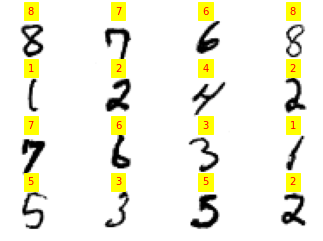



epoch -> [146/250], discriminator_loss_for_real_data = 299.33, discriminator_loss_for_fake_data = 295.65, generator_loss = 398.55



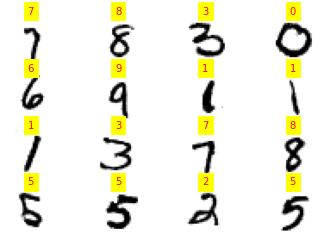



epoch -> [147/250], discriminator_loss_for_real_data = 298.57, discriminator_loss_for_fake_data = 293.89, generator_loss = 402.66



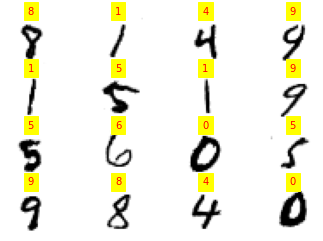



epoch -> [148/250], discriminator_loss_for_real_data = 298.29, discriminator_loss_for_fake_data = 293.20, generator_loss = 404.47



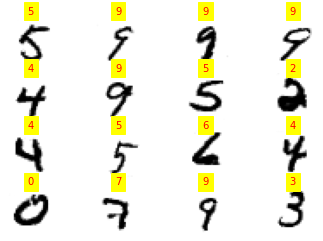



epoch -> [149/250], discriminator_loss_for_real_data = 297.86, discriminator_loss_for_fake_data = 293.31, generator_loss = 403.71



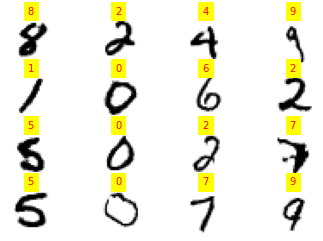



epoch -> [150/250], discriminator_loss_for_real_data = 296.89, discriminator_loss_for_fake_data = 293.84, generator_loss = 404.12



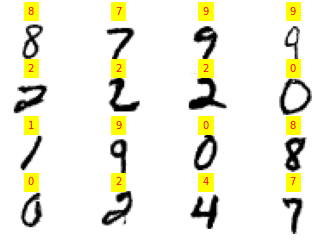



epoch -> [151/250], discriminator_loss_for_real_data = 295.28, discriminator_loss_for_fake_data = 292.81, generator_loss = 407.32



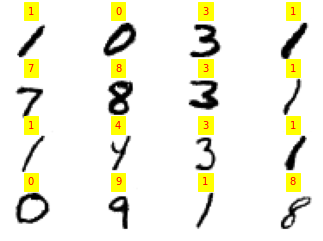



epoch -> [152/250], discriminator_loss_for_real_data = 295.67, discriminator_loss_for_fake_data = 289.25, generator_loss = 412.45



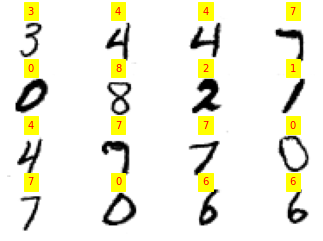



epoch -> [153/250], discriminator_loss_for_real_data = 294.93, discriminator_loss_for_fake_data = 290.63, generator_loss = 411.90



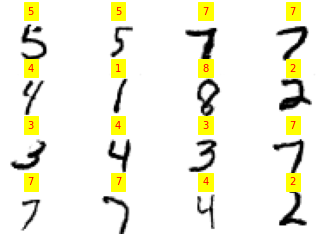



epoch -> [154/250], discriminator_loss_for_real_data = 293.84, discriminator_loss_for_fake_data = 287.51, generator_loss = 415.86



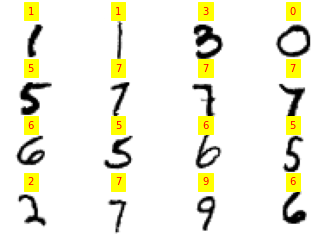



epoch -> [155/250], discriminator_loss_for_real_data = 293.91, discriminator_loss_for_fake_data = 288.56, generator_loss = 415.33



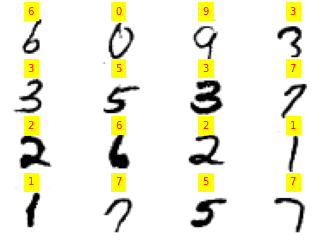



epoch -> [156/250], discriminator_loss_for_real_data = 293.12, discriminator_loss_for_fake_data = 289.25, generator_loss = 415.27



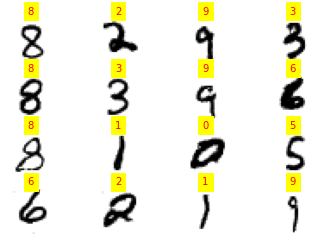



epoch -> [157/250], discriminator_loss_for_real_data = 293.02, discriminator_loss_for_fake_data = 286.74, generator_loss = 418.97



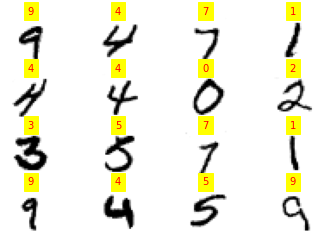



epoch -> [158/250], discriminator_loss_for_real_data = 292.95, discriminator_loss_for_fake_data = 287.29, generator_loss = 417.96



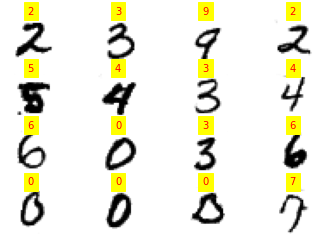



epoch -> [159/250], discriminator_loss_for_real_data = 290.65, discriminator_loss_for_fake_data = 285.52, generator_loss = 421.56



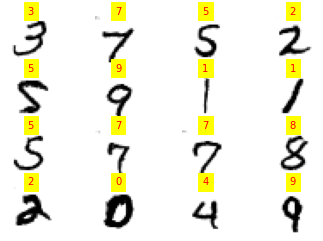



epoch -> [160/250], discriminator_loss_for_real_data = 290.74, discriminator_loss_for_fake_data = 284.70, generator_loss = 426.17



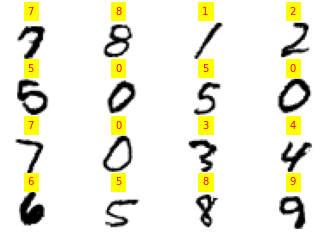



epoch -> [161/250], discriminator_loss_for_real_data = 289.86, discriminator_loss_for_fake_data = 282.37, generator_loss = 429.97



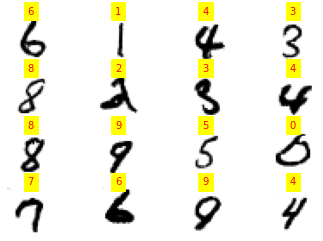



epoch -> [162/250], discriminator_loss_for_real_data = 287.25, discriminator_loss_for_fake_data = 282.74, generator_loss = 430.04



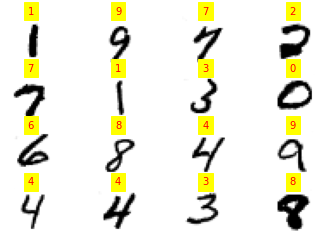



epoch -> [163/250], discriminator_loss_for_real_data = 289.15, discriminator_loss_for_fake_data = 281.96, generator_loss = 430.85



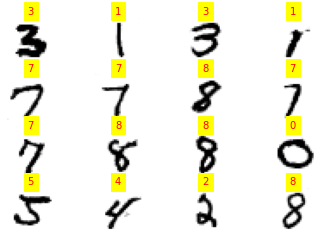



epoch -> [164/250], discriminator_loss_for_real_data = 287.42, discriminator_loss_for_fake_data = 282.18, generator_loss = 431.43



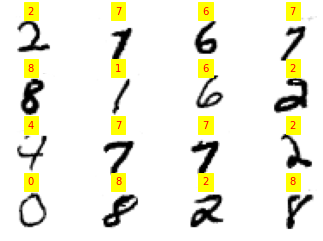



epoch -> [165/250], discriminator_loss_for_real_data = 286.89, discriminator_loss_for_fake_data = 279.97, generator_loss = 433.67



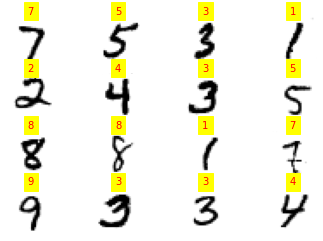



epoch -> [166/250], discriminator_loss_for_real_data = 287.22, discriminator_loss_for_fake_data = 280.49, generator_loss = 437.31



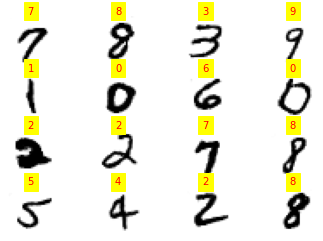



epoch -> [167/250], discriminator_loss_for_real_data = 285.98, discriminator_loss_for_fake_data = 280.62, generator_loss = 437.84



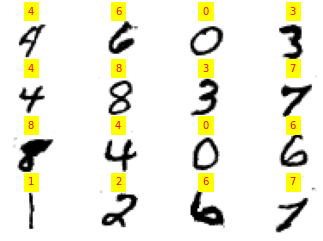



epoch -> [168/250], discriminator_loss_for_real_data = 284.82, discriminator_loss_for_fake_data = 278.14, generator_loss = 438.93



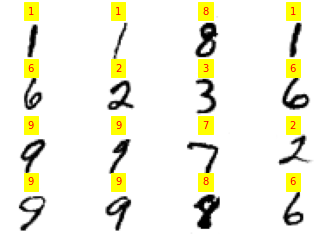



epoch -> [169/250], discriminator_loss_for_real_data = 284.00, discriminator_loss_for_fake_data = 277.36, generator_loss = 443.64



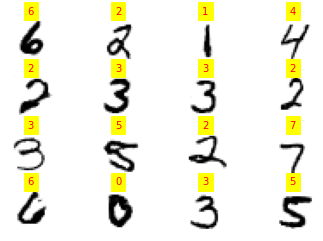



epoch -> [170/250], discriminator_loss_for_real_data = 283.85, discriminator_loss_for_fake_data = 276.83, generator_loss = 445.22



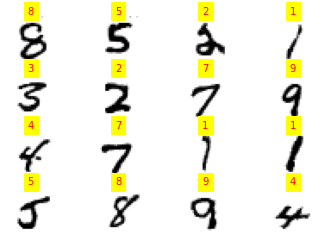



epoch -> [171/250], discriminator_loss_for_real_data = 282.38, discriminator_loss_for_fake_data = 276.24, generator_loss = 446.56



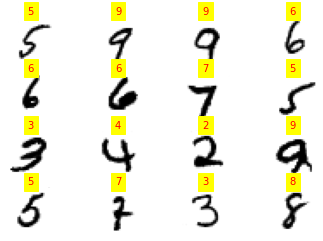



epoch -> [172/250], discriminator_loss_for_real_data = 282.24, discriminator_loss_for_fake_data = 274.30, generator_loss = 448.24



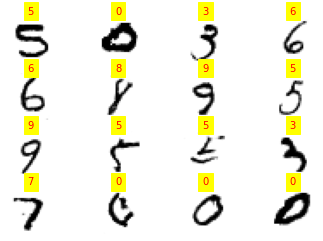



epoch -> [173/250], discriminator_loss_for_real_data = 281.26, discriminator_loss_for_fake_data = 274.15, generator_loss = 452.58



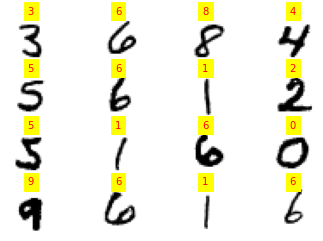



epoch -> [174/250], discriminator_loss_for_real_data = 281.40, discriminator_loss_for_fake_data = 272.93, generator_loss = 456.37



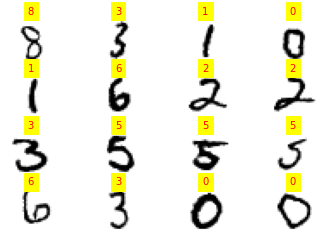



epoch -> [175/250], discriminator_loss_for_real_data = 280.47, discriminator_loss_for_fake_data = 272.15, generator_loss = 455.43



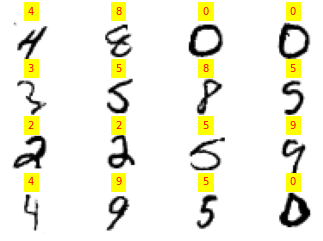



epoch -> [176/250], discriminator_loss_for_real_data = 278.69, discriminator_loss_for_fake_data = 270.14, generator_loss = 459.76



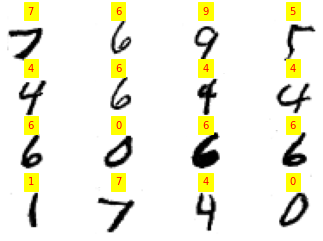



epoch -> [177/250], discriminator_loss_for_real_data = 278.41, discriminator_loss_for_fake_data = 268.60, generator_loss = 461.17



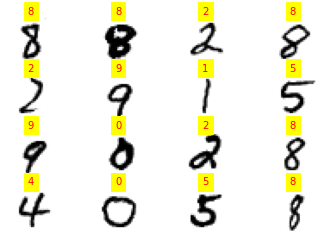



epoch -> [178/250], discriminator_loss_for_real_data = 278.15, discriminator_loss_for_fake_data = 270.21, generator_loss = 462.71



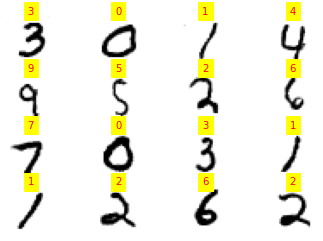



epoch -> [179/250], discriminator_loss_for_real_data = 277.32, discriminator_loss_for_fake_data = 268.60, generator_loss = 463.50



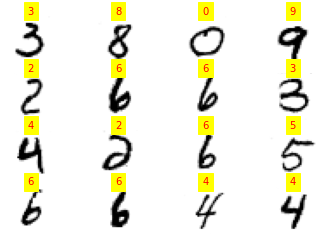



epoch -> [180/250], discriminator_loss_for_real_data = 274.95, discriminator_loss_for_fake_data = 267.62, generator_loss = 466.51



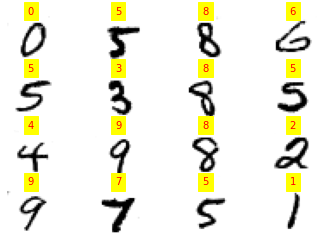



epoch -> [181/250], discriminator_loss_for_real_data = 275.68, discriminator_loss_for_fake_data = 265.79, generator_loss = 473.23



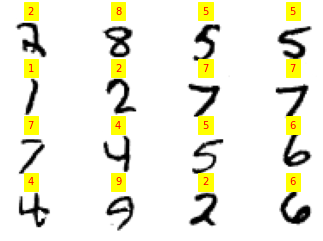



epoch -> [182/250], discriminator_loss_for_real_data = 276.51, discriminator_loss_for_fake_data = 267.24, generator_loss = 469.70



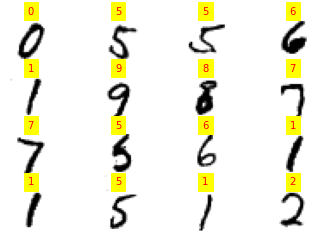



epoch -> [183/250], discriminator_loss_for_real_data = 276.46, discriminator_loss_for_fake_data = 266.85, generator_loss = 469.58



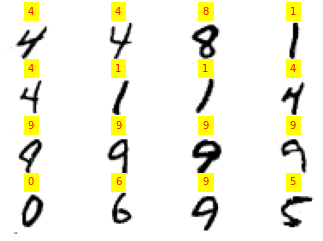



epoch -> [184/250], discriminator_loss_for_real_data = 274.03, discriminator_loss_for_fake_data = 266.82, generator_loss = 472.45



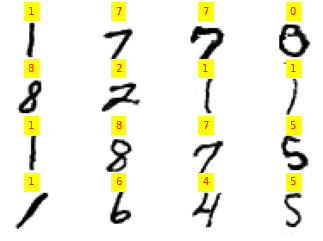



epoch -> [185/250], discriminator_loss_for_real_data = 272.92, discriminator_loss_for_fake_data = 262.60, generator_loss = 477.72



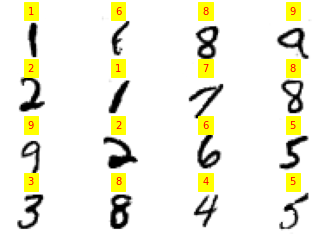



epoch -> [186/250], discriminator_loss_for_real_data = 273.15, discriminator_loss_for_fake_data = 262.61, generator_loss = 479.10



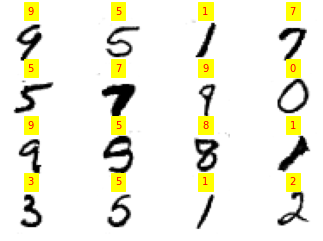



epoch -> [187/250], discriminator_loss_for_real_data = 273.80, discriminator_loss_for_fake_data = 263.91, generator_loss = 476.98



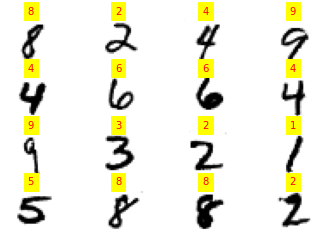



epoch -> [188/250], discriminator_loss_for_real_data = 272.77, discriminator_loss_for_fake_data = 261.84, generator_loss = 478.92



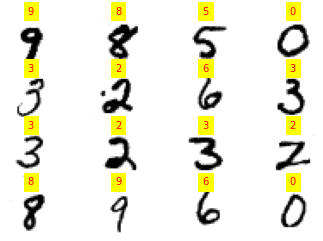



epoch -> [189/250], discriminator_loss_for_real_data = 272.66, discriminator_loss_for_fake_data = 260.76, generator_loss = 484.12



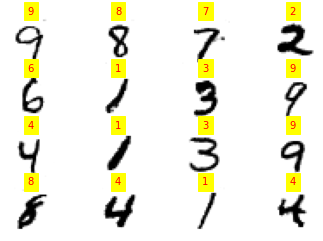



epoch -> [190/250], discriminator_loss_for_real_data = 269.82, discriminator_loss_for_fake_data = 258.21, generator_loss = 489.83



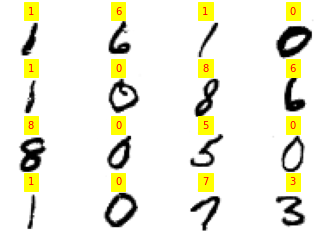



epoch -> [191/250], discriminator_loss_for_real_data = 270.82, discriminator_loss_for_fake_data = 260.69, generator_loss = 486.54



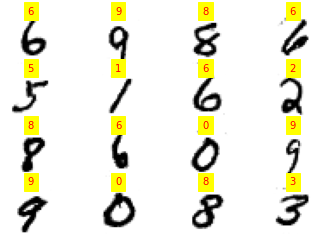



epoch -> [192/250], discriminator_loss_for_real_data = 268.97, discriminator_loss_for_fake_data = 258.00, generator_loss = 492.92



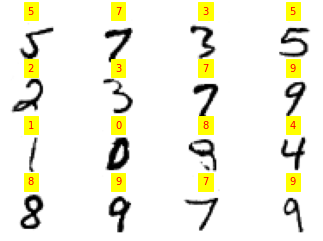



epoch -> [193/250], discriminator_loss_for_real_data = 268.96, discriminator_loss_for_fake_data = 257.63, generator_loss = 495.05



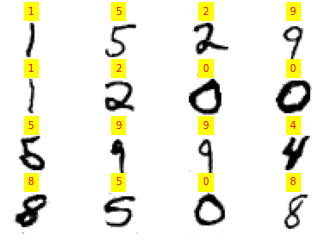



epoch -> [194/250], discriminator_loss_for_real_data = 268.28, discriminator_loss_for_fake_data = 255.99, generator_loss = 500.85



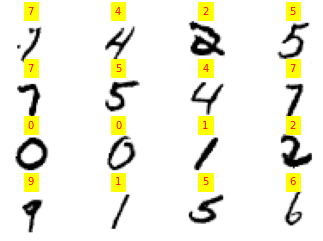



epoch -> [195/250], discriminator_loss_for_real_data = 267.43, discriminator_loss_for_fake_data = 255.68, generator_loss = 498.97



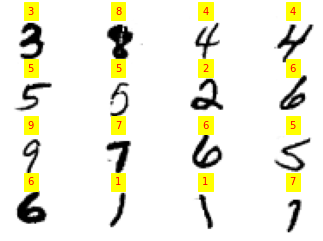



epoch -> [196/250], discriminator_loss_for_real_data = 266.12, discriminator_loss_for_fake_data = 254.73, generator_loss = 502.08



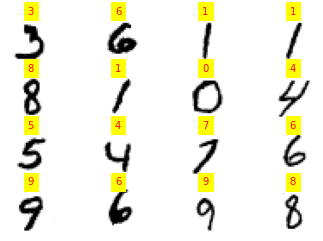



epoch -> [197/250], discriminator_loss_for_real_data = 266.05, discriminator_loss_for_fake_data = 253.24, generator_loss = 504.08



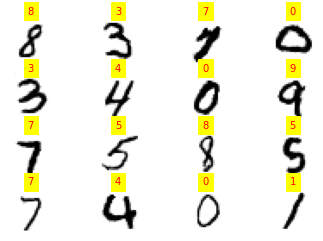



epoch -> [198/250], discriminator_loss_for_real_data = 265.07, discriminator_loss_for_fake_data = 255.06, generator_loss = 500.30



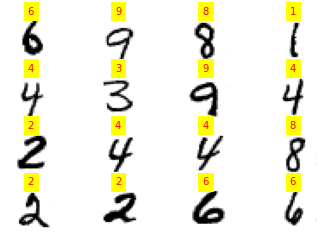



epoch -> [199/250], discriminator_loss_for_real_data = 265.14, discriminator_loss_for_fake_data = 253.12, generator_loss = 507.00



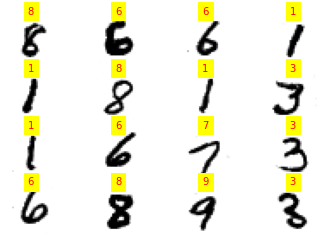



epoch -> [200/250], discriminator_loss_for_real_data = 262.80, discriminator_loss_for_fake_data = 251.34, generator_loss = 510.10



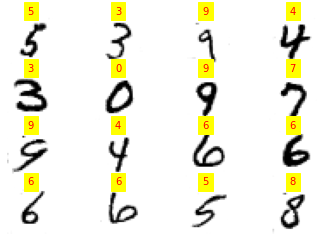



epoch -> [201/250], discriminator_loss_for_real_data = 262.83, discriminator_loss_for_fake_data = 251.34, generator_loss = 509.91



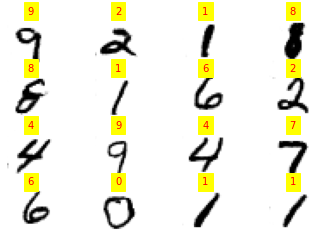



epoch -> [202/250], discriminator_loss_for_real_data = 264.15, discriminator_loss_for_fake_data = 253.57, generator_loss = 508.81



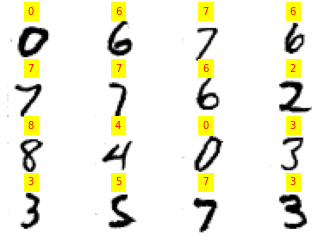



epoch -> [203/250], discriminator_loss_for_real_data = 260.52, discriminator_loss_for_fake_data = 248.92, generator_loss = 516.50



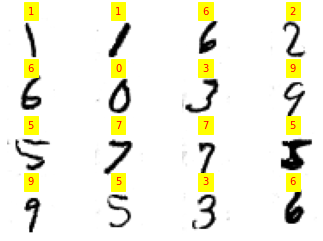



epoch -> [204/250], discriminator_loss_for_real_data = 262.87, discriminator_loss_for_fake_data = 252.57, generator_loss = 516.02



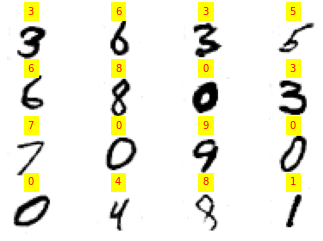



epoch -> [205/250], discriminator_loss_for_real_data = 260.06, discriminator_loss_for_fake_data = 248.42, generator_loss = 522.32



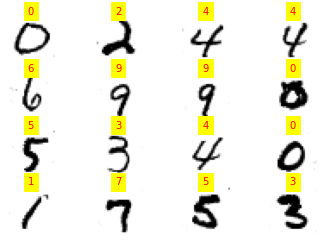



epoch -> [206/250], discriminator_loss_for_real_data = 260.78, discriminator_loss_for_fake_data = 249.99, generator_loss = 520.73



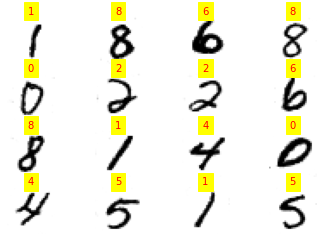



epoch -> [207/250], discriminator_loss_for_real_data = 260.09, discriminator_loss_for_fake_data = 247.44, generator_loss = 525.09



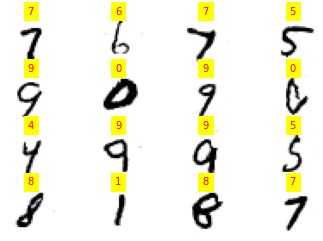



epoch -> [208/250], discriminator_loss_for_real_data = 258.84, discriminator_loss_for_fake_data = 248.01, generator_loss = 524.37



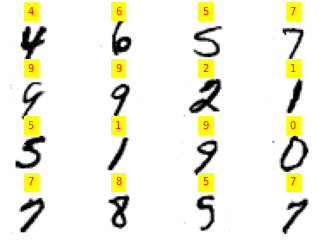



epoch -> [209/250], discriminator_loss_for_real_data = 258.06, discriminator_loss_for_fake_data = 247.41, generator_loss = 527.75



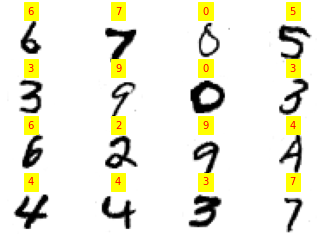



epoch -> [210/250], discriminator_loss_for_real_data = 257.33, discriminator_loss_for_fake_data = 245.10, generator_loss = 529.30



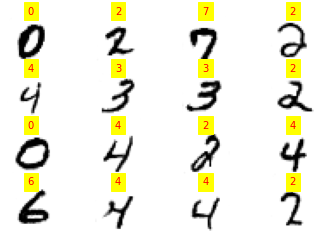



epoch -> [211/250], discriminator_loss_for_real_data = 257.95, discriminator_loss_for_fake_data = 243.30, generator_loss = 534.52



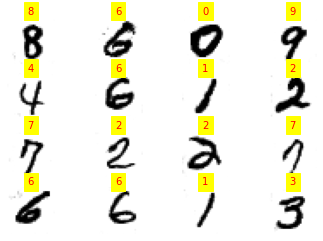



epoch -> [212/250], discriminator_loss_for_real_data = 257.17, discriminator_loss_for_fake_data = 245.81, generator_loss = 532.09



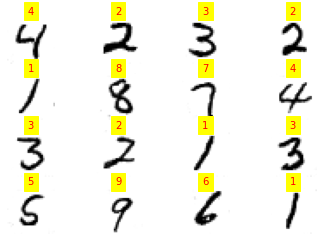



epoch -> [213/250], discriminator_loss_for_real_data = 257.00, discriminator_loss_for_fake_data = 243.36, generator_loss = 538.98



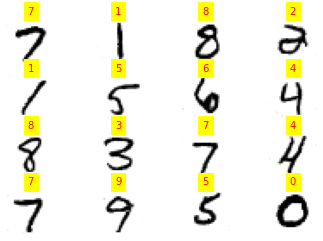



epoch -> [214/250], discriminator_loss_for_real_data = 256.95, discriminator_loss_for_fake_data = 245.43, generator_loss = 531.30



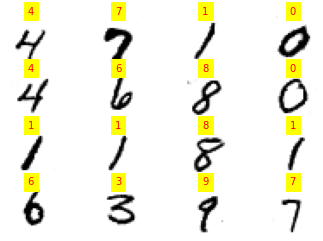



epoch -> [215/250], discriminator_loss_for_real_data = 256.67, discriminator_loss_for_fake_data = 243.57, generator_loss = 534.56



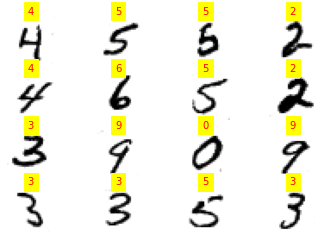



epoch -> [216/250], discriminator_loss_for_real_data = 256.96, discriminator_loss_for_fake_data = 244.71, generator_loss = 533.64



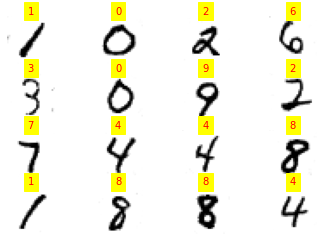



epoch -> [217/250], discriminator_loss_for_real_data = 255.16, discriminator_loss_for_fake_data = 243.54, generator_loss = 541.23



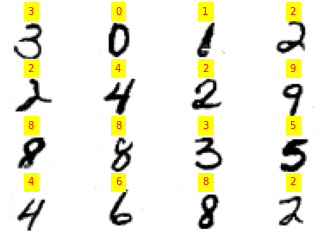

In [ ]:
with tf.device(device_name):

  # size of the latent space
  latent_dim = 100

  # number of epochs
  n_epochs = 250

  # create the discriminator model
  d_model = discriminator_model()

  # create the generator model
  g_model = generator_model(latent_dim)

  # create the gan model
  gan_model = GAN_model(g_model, d_model)

  # load the data set
  dataset = load_real_samples()

  # ready to run our model
  print('\nREADY TO GO !!!\n')
  
  # start the trainging
  # train model
  train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs)

In [3]:
import numpy as np
import os
os.getcwd()
print(os.listdir())

['.ipynb_checkpoints', 'Conditional_Generative_Adversarial_Network_MNIST_Data_Set (4).ipynb', 'loss_record (2).npz', 'loss_record (3).npz', 'loss_record (4).npz', 'loss_record (5).npz']


In [5]:
loaded = np.load('loss_record (5).npz')
print(loaded['a'].shape)
print(loaded['b'].shape)
print(loaded['c'].shape)

(217,)
(217,)
(217,)


In [9]:
import matplotlib.pyplot as plt

g_loss = np.array(loaded['c'])

In [10]:
d_loss = np.array([(i+j) for i,j in zip(loaded['a'], loaded['b'])])

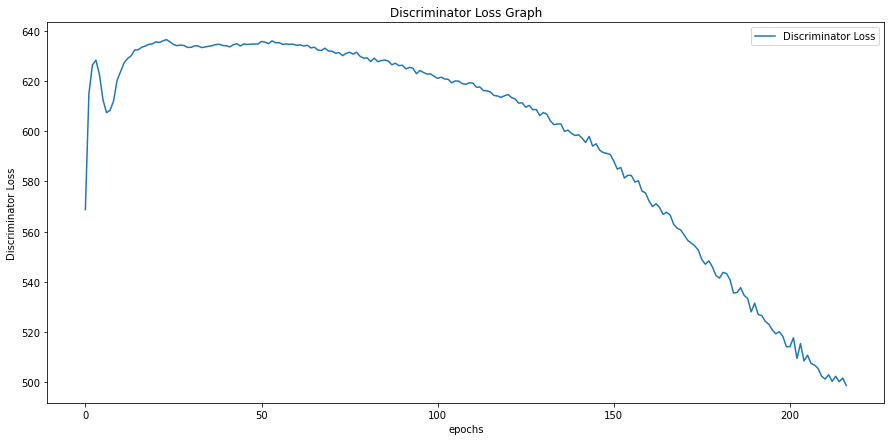

In [11]:
plt.figure(figsize=(15,7))
plt.plot(d_loss)
plt.title('Discriminator Loss Graph')
plt.ylabel('Discriminator Loss')
plt.xlabel('epochs')
plt.legend(["Discriminator Loss"], loc='upper right')
plt.show()

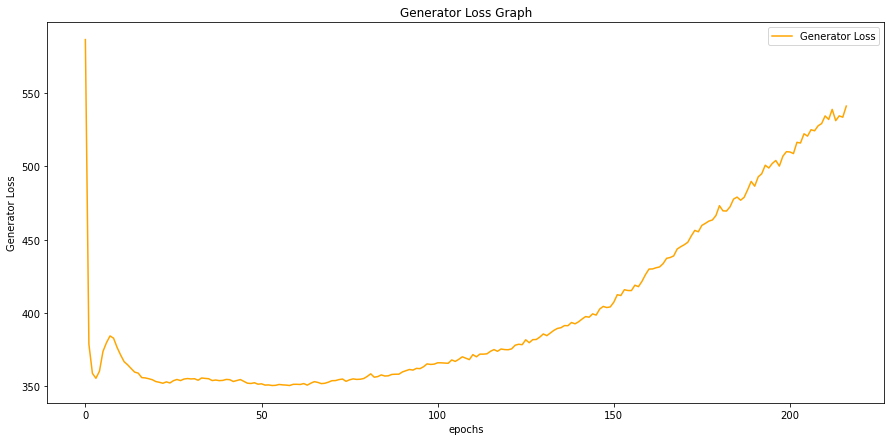

In [12]:
plt.figure(figsize=(15,7))
plt.plot(g_loss,color='orange')
plt.title('Generator Loss Graph')
plt.ylabel('Generator Loss')
plt.xlabel('epochs')
plt.legend(["Generator Loss"], loc='upper right')
plt.show()

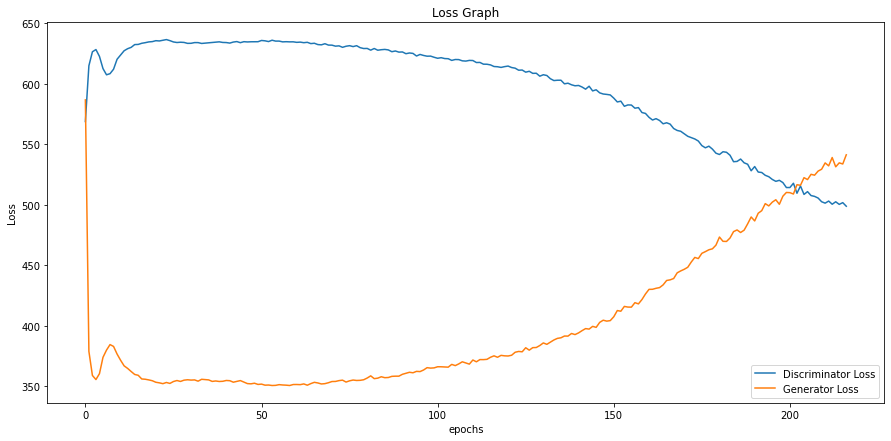

In [13]:
plt.figure(figsize=(15,7))
plt.plot(d_loss)
plt.plot(g_loss)
plt.title('Loss Graph')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(["Discriminator Loss", "Generator Loss"], loc='lower right')
plt.show()